<a href="https://colab.research.google.com/github/mauricionoris/25B3_ml/blob/master/colabs/MNIST_part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feedfoward  Neural  Network
Fully Connected Network
##Deep Learning (MNIST Classification) -  part #4


##Overfitting and Regularization
Uma questão que ainda não respondemos é o que fazer quando um modelo não está apresentando um bom desempenho. Isso é muito comum em modelos de *Deep Learning*. Treinamos um modelo e o desempenho no conjunto de teste acaba sendo decepcionante.

Esse problema pode ocorrer por vários motivos:

* poucos dados disponíveis
* arquitetura incorreta
* treinamento insuficiente
* hiperparâmetros inadequados

Como podemos abordar o processo de depuração e melhoria de um modelo?

Este capítulo trata de algumas técnicas para isso. Começaremos apresentando as **Curvas de Aprendizado**, uma ferramenta útil para decidir se é necessário mais dado. Em seguida, veremos diversas técnicas de **regularização**, que podem ajudar a combater o **overfitting**. Algumas dessas técnicas foram inventadas muito recentemente.

Por fim, discutiremos **aumentação de dados**, que é útil em alguns casos, como quando os dados de entrada são imagens. Concluiremos o notebook com uma breve parte sobre **otimização de hiperparâmetros**, um tema vasto que pode ser abordado de várias maneiras.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# MNIST digit dataset
from tensorflow.keras.datasets import mnist
# split train and test datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reescalonamento
X_train, X_test = X_train / 255.0, X_test / 255.0
# não vamos utilizar o reshape pois usaremos a camada Flatten na entrada da rede
# X_train = X_train.reshape(-1, 28*28)
# X_test = X_test.reshape(-1, 28*28)

2025-01-17 17:20:06.352166: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, backend
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten

# inicializa a sessão
backend.clear_session()
# inicialização do modelo
model = Sequential(name='Deep1')
# Camada de entrada
model.add(Input(shape=(28,28), name='input'))
# Flatten layer: 28x28 --> 784
model.add(Flatten())
# hidden layers
model.add(Dense(1024, activation='relu', name='first_dense'))
model.add(Dense(512, activation='relu', name='second_dense'))
model.add(Dense(256, activation='relu', name='third_dense'))
model.add(Dense(128, activation='relu', name='fourth_dense'))
# saída
model.add(Dense(10, activation='softmax', name='output_dense'))
# salva os pesos e bias com os valores inicias
initial_weights = model.get_weights()
model.summary()

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# optimizers
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop, Adadelta
# compilando o modelo da rede com learning_rating=0.05
model.compile(optimizer=SGD(0.05), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# função para calcular o tempo de treinamento da rede
def processing_time(start_t, finish_t):
  tot_seg = finish_t - start_t
  t_min = tot_seg // 60
  t_seg = tot_seg % 60
  print("\nTempo de treinamento da rede:%2im%2is"% (t_min, t_seg))

In [ ]:
import time
# início do treinamento da rede
start_time = time.process_time()
# carrega os pesos e bias com os valores inicias, para um novo treinamento da rede
model.set_weights(initial_weights)
# treinamento da rede
h = model.fit(X_train, y_train, batch_size=64, epochs=15, verbose=1, validation_split=0.1)
# tempo total de treinamento da rede
processing_time(start_time, time.process_time())

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7937 - loss: 0.7094 - val_accuracy: 0.9558 - val_loss: 0.1511
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9532 - loss: 0.1539 - val_accuracy: 0.9730 - val_loss: 0.0921
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9706 - loss: 0.0958 - val_accuracy: 0.9705 - val_loss: 0.0990
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9796 - loss: 0.0684 - val_accuracy: 0.9778 - val_loss: 0.0779
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9863 - loss: 0.0458 - val_accuracy: 0.9803 - val_loss: 0.0679
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9897 - loss: 0.0350 - val_accuracy: 0.9778 - val_loss: 0.0742
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9930 - loss: 0.0262 - val_accuracy: 0.9783 - val_loss: 0.0767
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9965 - loss: 0.0170 - val_accuracy: 0.

In [ ]:
def plot_acc_loss(h):

  plt.figure(figsize = (11,5))
  plt.subplot(1,2,1)
  plt.plot(h.history['loss'], label = 'Treino')
  plt.plot(h.history['val_loss'], label = 'Validação')
  plt.xlabel('Épocas')
  plt.ylabel('Função Custo')
  plt.title('loss')
  plt.xticks()
  plt.yticks()
  plt.legend()
  plt.grid()
  plt.subplot(1,2,2)
  plt.plot(h.history['accuracy'], label = 'Treino')
  plt.plot(h.history['val_accuracy'], label = 'Validação')
  plt.xlabel('Épocas')
  plt.ylabel('Acurácia')
  plt.title('accuracy')
  plt.xticks()
  plt.yticks()
  plt.legend()
  plt.tight_layout()
  plt.grid()
  plt.show()

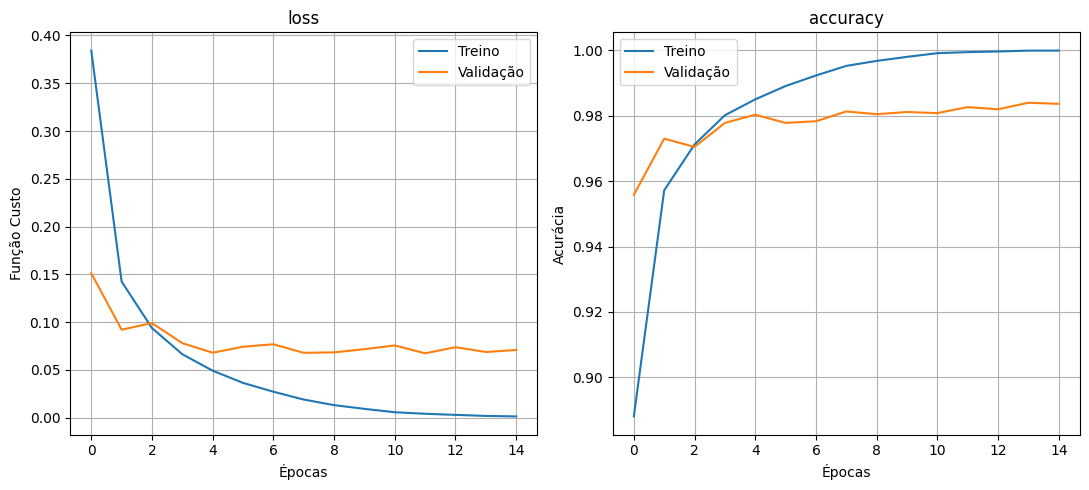

In [ ]:
plot_acc_loss(h)

## Overfitting

Nota-se nos gráficos acima que obtém-se uma acurácia de ~100% para o dataset de treino e de ~98% nos dados de validação, o que sugere um *overfitting*, demostrando que a rede se tornou *especialista* no banco de dados de treinamento, não conseguindo o mesmo desempenho no banco de dados de validação e de teste.

Veremos abaixo as técnicas para prevenção e correção do overfitting.

In [ ]:
# salvando o modelo (modelo, pesos e bias) para predições futuras sem ter que treiná-lo novamente
from keras.models import model_from_json
model_json = model.to_json()
with open("Colab Notebooks/models/model_1_deeplearning.json","w") as json_file: #/content/drive/MyDrive/
    json_file.write(model_json)
model.save_weights("Colab Notebooks/models/weights_1.weights.h5") #/content/drive/MyDrive/
print('Saved model to disk')

Saved model to disk


## Learning curves

The first tool we present is the [**Learning Curve**](https://en.wikipedia.org/wiki/Learning_curve). A learning curve plots the behavior of the training and validation scores as a function of how much training data we fed to the model.

O desempenho no conjunto de teste é menor do que no conjunto de treinamento, o que indica que o modelo está sofrendo de **overfitting**.

> **DICA:** *Overfitting* é um conceito fundamental em *Machine Learning* e *Deep Learning*.

Antes de começarmos a explorar diferentes técnicas para reduzir o *overfitting*, é legítimo perguntar se não temos dados suficientes para resolver o problema.

*Essa é uma situação muito comum*: você coleta dados com rótulos, treina um modelo e ele não apresenta o desempenho esperado.

O que fazer nesse ponto? Será que você deveria coletar mais dados? Ou, alternativamente, investir tempo em buscar melhores atributos ou um modelo diferente?

Com as poucas informações disponíveis, é difícil saber qual dessas alternativas terá mais chance de ajudar. O que é certo, por outro lado, é que todas essas opções envolvem um custo. Por exemplo, digamos que você acredita que o que falta é mais dado.

Coletar mais dados rotulados pode ser algo tão barato e simples quanto baixar um novo *dataset* da sua fonte, ou tão trabalhoso e complexo quanto coordenar com a equipe de coleta de dados da sua empresa, contratar pessoas para rotular manualmente os novos exemplos, e assim por diante. Em outras palavras, o tempo e o custo associados à coleta de novos dados variam muito e precisam ser avaliados caso a caso.

Se, por outro lado, você decidir experimentar novas características (*features*) e arquiteturas de modelos, isso pode ser tão simples quanto adicionar algumas camadas e neurônios ao modelo, ou tão complexo quanto um time de P\&D dedicar vários meses para descobrir novos atributos adequados ao seu conjunto de dados específico. Novamente, o custo real dessa alternativa depende fortemente do seu caso de uso.

Qual das duas escolhas é mais promissora?

Será que precisamos de mais dados ou de um modelo melhor?

Uma **curva de aprendizado** é uma ferramenta que podemos usar para responder a essa pergunta. Veja a seguir como construí-la.


Primeiro, separamos o `X_test`. Em seguida, pegamos frações cada vez maiores de `X_train` e as utilizamos para treinar o modelo. Para cada uma dessas frações, ajustamos o modelo. Depois, avaliamos o desempenho tanto nessa fração de treino quanto no conjunto de teste.

Como a quantidade inicial de dados de treino é pequena, esperamos que o modelo faça *overfitting* nesses dados e apresente um desempenho bem fraco no conjunto de teste.

À medida que vamos aumentando a quantidade de dados de treino, o modelo deve melhorar e aprender a generalizar melhor, ou seja, a pontuação no teste deve aumentar. Continuamos esse processo até utilizar todo o nosso conjunto de treinamento.


Neste ponto, dois cenários são possíveis. Se parecer que o desempenho no teste parou de aumentar conforme o tamanho do conjunto de treino cresce, provavelmente atingimos a performance máxima do nosso modelo. Nesse caso, o ideal é investir tempo na busca por um modelo melhor para melhorar os resultados.

No segundo cenário, pode parecer que o erro de teste continuaria diminuindo se tivéssemos acesso a mais dados de treinamento. Se for esse o caso, o passo mais adequado é sair em busca de mais dados rotulados antes de se preocupar em alterar o modelo.

Portanto, agora você já sabe como responder à grande questão — **mais dados ou um modelo melhor?** A resposta é: *use uma curva de aprendizado*.

Vamos desenhar uma juntos. Primeiro, pegamos frações crescentes dos dados de treinamento usando a função `np.linspace`.

> **DICA:** `np.linspace` retorna números igualmente espaçados em um intervalo especificado. Neste caso, estamos criando quatro frações, de 10% a 90% dos dados.


In [ ]:
fracs = np.linspace(0.1, 0.9, 5)
fracs

array([0.1, 0.3, 0.5, 0.7, 0.9])

In [ ]:
train_sizes = list((len(X_train) * fracs).astype(int))
train_sizes

[6000, 18000, 30000, 42000, 54000]

Em seguida, percorremos os diferentes tamanhos de treino e, para cada `train_size`, fazemos o seguinte:

* selecionamos exatamente `train_size` amostras do `X_train`
* reiniciamos o modelo para os pesos iniciais
* treinamos o modelo utilizando apenas essa fração dos dados de treino
* avaliamos o modelo nessa mesma fração de dados de treino
* avaliamos o modelo no conjunto de teste
* armazenamos ambas as pontuações em arrays para, posteriormente, gerar os gráficos


Lidando com isso no primeiro caso (isto é, o primeiro `train_size` no nosso array `train_sizes`), usaremos esse procedimento como base para depois iterar sobre toda a lista de tamanhos de treino.

Vamos criar algumas variáveis para armazenar nossas pontuações. Em seguida, iteraremos sobre os diferentes tamanhos de treino e iremos preencher as variáveis `train_scores` e `test_scores`:


In [ ]:
from sklearn.model_selection import train_test_split
train_scores = []
test_scores = []
start_time = time.process_time()

for train_size in train_sizes:
    inter_time = time.process_time()
    X_train_frac, _, y_train_frac, _ = train_test_split(X_train, y_train, train_size=train_size,
                     test_size=None, random_state=0, stratify=y_train)

    model.set_weights(initial_weights)
    h = model.fit(X_train_frac, y_train_frac, batch_size=64, epochs=15, verbose=0, validation_split=0.1)
    # Returns the loss value & metrics values for the model for X_train
    r = model.evaluate(X_train_frac, y_train_frac, verbose=0)
    # save accuracy on list
    train_scores.append(r[-1])
    # Returns the loss value & metrics values for the model for X_test
    e = model.evaluate(X_test, y_test, verbose=0)
     # save accuracy on list
    test_scores.append(e[-1])
    print("Done size: ", train_size)

    training_time_s = time.process_time() - inter_time
    training_time_m = training_time_s / 60
    print("Tempo: %.2f segundos (%.2f minutos)" % (training_time_s, training_time_m))

processing_time(start_time, time.process_time())

Done size:  6000
Tempo: 45.69 segundos (0.76 minutos)
Done size:  18000
Tempo: 131.75 segundos (2.20 minutos)
Done size:  30000
Tempo: 220.73 segundos (3.68 minutos)
Done size:  42000
Tempo: 304.04 segundos (5.07 minutos)
Done size:  54000
Tempo: 392.62 segundos (6.54 minutos)

Tempo de treinamento da rede:18m14s


Vamos agora plotar a pontuação de treino e a pontuação de teste em função do aumento do tamanho do conjunto de treinamento:

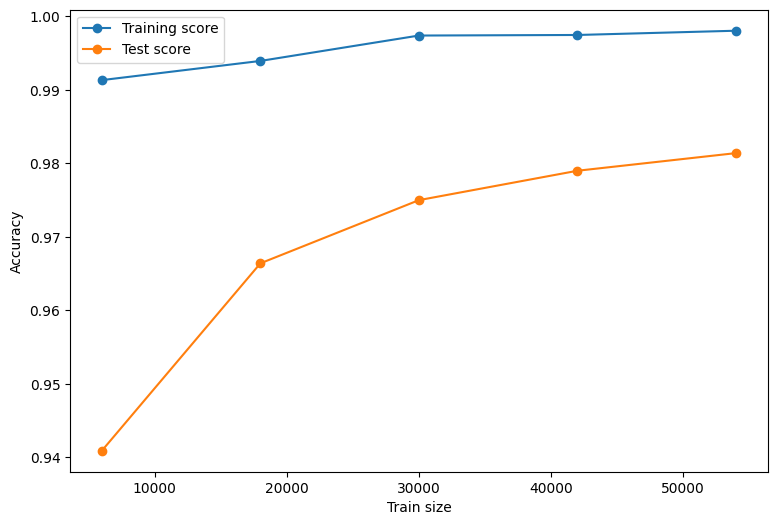

In [ ]:
plt.figure(figsize = (9,6))
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Test score")
plt.legend(loc="best")
plt.xlabel('Train size')
plt.ylabel('Accuracy')
plt.show()

Avaliando a curva, parece que a pontuação no teste continuaria melhorando se adicionássemos mais dados. Essa é exatamente a indicação que estávamos buscando. Por outro lado, se a pontuação no teste não estivesse melhorando, seria mais promissor investir primeiro em melhorar o modelo e só depois considerar a busca por mais dados, caso ainda fosse necessário.


## O que é *overfitting*?

É uma armadilha comum em algoritmos de *deep learning*, na qual o modelo tenta se ajustar completamente aos dados de treinamento e acaba memorizando tanto os padrões quanto o ruído e as flutuações aleatórias presentes nos dados. Com isso, o modelo falha em **generalizar** e apresentar bom desempenho em cenários com dados não vistos, comprometendo sua utilidade.

**Quando o *overfitting* pode ocorrer?**

Uma alta variância no desempenho do modelo é um forte indício de *overfitting*.

O tempo excessivo de treinamento ou a complexidade arquitetural do modelo podem causar esse problema. Se o modelo for treinado por muito tempo sobre os dados de treino ou for demasiadamente complexo, ele tende a aprender também o ruído ou informações irrelevantes do conjunto de dados.


## Métodos de Regularização para Redes Neurais

O método de regularização mais simples e talvez mais comum é adicionar uma penalidade à função de perda proporcional ao tamanho dos pesos do modelo.

1. **Regularização de Pesos (*Weight Regularization* ou *Weight Decay*)**: Penaliza o modelo durante o treinamento com base na magnitude dos pesos, evitando que se tornem excessivamente grandes.

A seguir, uma lista de cinco métodos adicionais de regularização comumente usados:

1. **Regularização de Atividade (*Activity Regularization*)**: Penaliza o modelo durante o treinamento com base na magnitude das ativações.
2. **Restrição de Pesos (*Weight Constraint*)**: Restringe a magnitude dos pesos a um intervalo específico ou abaixo de um limite definido.
3. **Dropout**: Remove probabilisticamente algumas entradas durante o treinamento, ajudando a reduzir a dependência entre neurônios.
4. **Ruído (*Noise*)**: Adiciona ruído estatístico aos dados de entrada durante o treinamento, tornando o modelo mais robusto.
5. **Parada Antecipada (*Early Stopping*)**: Monitora o desempenho do modelo em um conjunto de validação e interrompe o treinamento quando o desempenho começa a se degradar.


## Reducing Overfitting

Às vezes, não é fácil sair em busca de mais dados, pois isso pode ser caro e consumir muito tempo. Existem algumas maneiras de melhorar um modelo e reduzir sua propensão a *overfitting* sem precisar de dados adicionais. Essas estratégias fazem parte da grande família das **técnicas de regularização**.

A ideia geral é a seguinte: até agora, você deve ter entendido que a complexidade de um modelo está, de certa forma, relacionada ao número de parâmetros que ele possui. Simplificando, um modelo com muitas camadas e muitos neurônios é mais complexo do que um modelo com uma única camada e poucos neurônios. Mais complexidade dá ao modelo mais liberdade para aprender nuances nos dados de treinamento, o que torna as redes neurais tão poderosas.

Por outro lado, quanto mais liberdade um modelo tem, maior a probabilidade de ocorrer *overfitting*, perdendo a capacidade de generalizar. Poderíamos tentar reduzir essa liberdade diminuindo a complexidade do modelo, mas isso nem sempre é uma boa ideia, pois tornaria o modelo menos capaz de capturar padrões sutis nos dados.

Uma abordagem diferente é manter o modelo bastante complexo, mas alterar outros aspectos do treinamento para direcioná-lo a soluções menos complexas. Em outras palavras, em vez de remover a complexidade, permitimos que o modelo escolha soluções complexas, mas o conduzimos a soluções mais simples e **regulares**. Regularização se refere a técnicas que evitam que a complexidade do modelo saia do controle.

Vamos revisar algumas maneiras de regularizar um modelo e, para facilitar a comparação, definiremos algumas funções auxiliares.

Primeiro, vamos criar uma função auxiliar para repetir o treinamento várias vezes. Essa função será útil para suavizar flutuações estatísticas no comportamento do modelo causadas pela inicialização aleatória dos pesos. A cada iteração, iremos reiniciar o *backend* para economizar memória e apagar qualquer treinamento anterior.


### Model Regularization

\[Regularização]\([https://en.wikipedia.org/wiki/Regularization\_(mathematics%29)](https://en.wikipedia.org/wiki/Regularization_%28mathematics%29%29) é um procedimento comum em *Machine Learning* e tem sido usada para melhorar o desempenho de modelos complexos com muitos parâmetros.

Lembre-se da [Função de Custo](https://en.wikipedia.org/wiki/Loss_function) que apresentamos anteriormente. O objetivo principal da função de custo é garantir que as previsões do modelo estejam próximas dos rótulos corretos.

A regularização atua modificando a função de custo original $C$ com um termo adicional $\lambda C_r$, que penaliza, de certa forma, a complexidade do modelo:

$$
C' = C + \lambda C_r
$$

A função de custo original $C$ diminuiria à medida que as previsões do modelo se aproximassem dos rótulos reais. Em outras palavras, o algoritmo de *gradient descent* empurraria os parâmetros para regiões do espaço de parâmetros que fornecessem as melhores previsões para os dados de treino. Em modelos complexos com muitos parâmetros, isso poderia resultar em *overfitting* devido à grande liberdade do modelo.

O novo termo de penalidade $C_r$ força o modelo a ser "simples", ou seja, ele cresce com os parâmetros do modelo, mas não está relacionado à qualidade das previsões.

O custo total $C'$ é a combinação desses dois termos, e portanto o modelo precisará gerar as melhores previsões possíveis ao mesmo tempo em que mantém a simplicidade. O algoritmo de *gradient descent* passa a resolver, na prática, um problema de minimização **constrangida**, onde certas regiões do espaço de parâmetros são "caras demais" para serem usadas.

O hiperparâmetro $\lambda$ determina a força relativa da regularização e pode ser ajustado.

Mas como implementar $C_r$ na prática? Existem várias maneiras. A **Regularização de Pesos (*Weight Regularization*)** atribui uma penalidade proporcional ao tamanho dos pesos:

* A penalidade de **L1** é calculada como `loss = l1 * reduce_sum(abs(x))`

$$
C_w(L1) = \sum_w |w|
$$

* A penalidade de **L2** é calculada como `loss = l2 * reduce_sum(square(x))`

$$
C_w(L2) = \sum_w w^2
$$

A primeira é chamada de **L1-regularization** e corresponde à soma dos valores absolutos de cada peso. A segunda é chamada de **L2-regularization** e corresponde à soma dos quadrados dos pesos. Embora ambas reduzam a complexidade, o efeito de cada uma é diferente:

* A **L1** tende a empurrar a maioria dos pesos para zero, exceto por alguns poucos que permanecem não nulos, tornando a matriz de pesos **esparsa**.
* A **L2** suprime os pesos de forma quadrática, ou seja, pesos maiores contribuem muito mais para $C_r$ e para o custo total, fazendo com que todos os pesos fiquem relativamente pequenos.

De maneira semelhante à regularização de pesos, a **Regularização de Bias** e a **Regularização de Atividade** penalizam a função de custo com termos proporcionais ao tamanho dos vieses (*biases*) e das ativações, respectivamente.

Vamos agora comparar o comportamento do nosso modelo base com um modelo de mesma arquitetura, mas aplicado com **regularização L2 nos pesos**.


Começamos definindo uma função auxiliar que cria um modelo com regularização de pesos: partimos da função base_model e criamos a função regularized_model, adicionando a opção kernel_regularizer em cada camada.

from tensorflow.keras.regularizers import L1L2

In [ ]:
from tensorflow.keras.regularizers import L1L2
def regularized_model(l1=0.0001, l2=0.0001):
    """
    Return an l2-weight-regularized, fully connected
    model with 3 inner layers with 1024 nodes each
    and relu activation function.
    In this case, the default values used are l1=0.0001 and l2=0.0001.
    """
    #reg2=L1L2(l1=0.0005, l2=0.002)
    reg2=L1L2(l1, l2)
    backend.clear_session()
    model = Sequential(name='regularized_model')
    model.add(Input(shape=(28,28), name='input'))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu', kernel_regularizer=reg2))
    model.add(Dense(512, activation='relu', kernel_regularizer=reg2))
    model.add(Dense(256, activation='relu', kernel_regularizer=reg2))
    model.add(Dense(128, activation='relu', kernel_regularizer=reg2))
    model.add(Dense(10, activation='softmax'))
    initial_weights_ = model.get_weights()
    model.compile(optimizer=SGD(0.05), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model, initial_weights_

In [ ]:
L2_model, initial_weights_L2 = regularized_model(l1=0.0002, l2=0.0002)

Model: "regularized_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.process_time()
# carrega os pesos e bias com os valores inicias, para um novo treinamento da rede
L2_model.set_weights(initial_weights_L2)
# treinamento da rede
h = L2_model.fit(X_train, y_train, batch_size=64, epochs=15, verbose=1, validation_split=0.1)
# tempo total de treinamento da rede
processing_time(start_time, time.process_time())

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.7935 - loss: 9.9752 - val_accuracy: 0.9520 - val_loss: 7.5279
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9433 - loss: 6.9857 - val_accuracy: 0.9677 - val_loss: 5.3445
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9582 - loss: 4.9096 - val_accuracy: 0.9672 - val_loss: 3.6432
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9607 - loss: 3.3059 - val_accuracy: 0.9672 - val_loss: 2.3543
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9581 - loss: 2.1423 - val_accuracy: 0.9695 - val_loss: 1.5014
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9572 - loss: 1.3784 - val_accuracy: 0.9502 - val_loss: 1.0446
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9602 - loss: 0.9332 - val_accuracy: 0.9727 - val_loss: 0.7210
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9625 - loss: 0.7034 - 

Vamos agora comparar o desempenho do modelo com regularização de pesos com o nosso modelo base. Também vamos adicionar uma linha tracejada indicando a acurácia máxima no conjunto de teste obtida pelo modelo base:

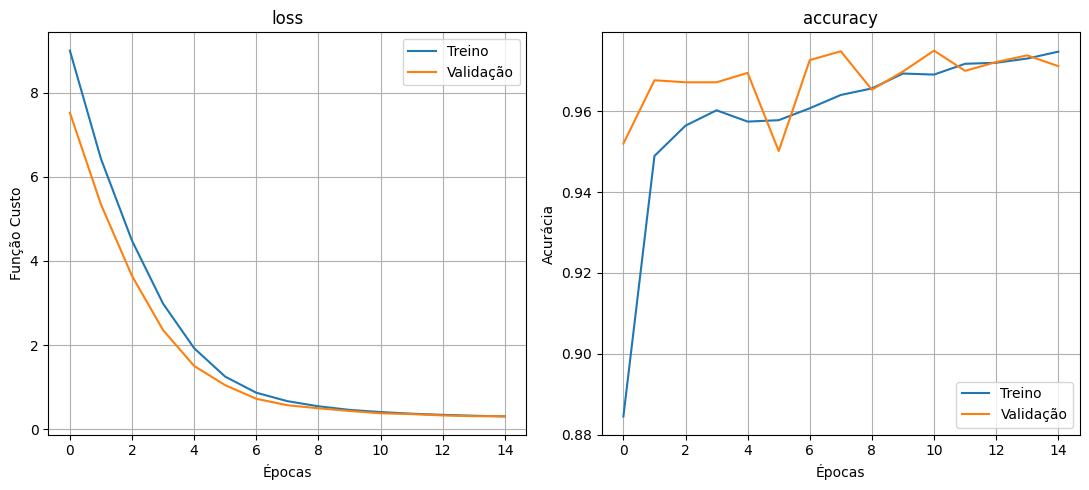

In [ ]:
plot_acc_loss(h)

Com este conjunto de dados específico, a regularização de pesos não parece melhorar o desempenho do modelo.

Isso é visível, pelo menos dentro do pequeno número de épocas que estamos utilizando. É possível que, se deixássemos o treinamento rodar por muito mais tempo, a regularização pudesse ajudar, mas não temos essa certeza, e isso poderia custar bastante tempo e recursos.

Ainda assim, é importante conhecer essa técnica e mantê-la em mente como uma das opções a serem testadas. Na prática, a regularização de pesos tem sido frequentemente substituída por técnicas mais modernas, como **Dropout** e **Batch Normalization**.


In [ ]:
# salvando o Modelo para predições futuras sem ter que treiná-lo novamente
from keras.models import model_from_json
model_json = L2_model.to_json()
with open("Colab Notebooks/models/model_2_deeplearning.json","w") as json_file: #/content/drive/MyDrive/
    json_file.write(model_json)
L2_model.save_weights("Colab Notebooks/models/weights_2.weights.h5") #/content/drive/MyDrive/
print('Saved model to disk')

Saved model to disk


## Dropout

\[Dropout]\([https://en.wikipedia.org/wiki/Dropout\_(neural\_networks%29)](https://en.wikipedia.org/wiki/Dropout_%28neural_networks%29%29) foi introduzido em 2014 por [Srivastava et al.](http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf) na Universidade de Toronto para lidar com o problema de *overfitting* em redes grandes. A ideia central do Dropout é remover unidades aleatoriamente (junto com suas conexões) da rede neural durante o treinamento.

Em outras palavras, durante a fase de treinamento, cada unidade tem uma probabilidade não nula de não enviar sua saída para a próxima camada. Isso evita que as unidades se tornem excessivamente dependentes umas das outras.

Pode parecer contra-intuitivo: estamos enfraquecendo a rede ao desligar aleatoriamente parte das unidades durante o treinamento, dificultando seu aprendizado. Por que prejudicar o modelo?

O princípio subjacente é bastante universal em *Machine Learning*: tornamos a rede menos estável durante o treinamento para que a solução encontrada seja mais **geral**, **robusta** e **resistente a falhas**. Outra forma de ver isso é considerar que estamos adicionando ruído no treinamento, obrigando a rede a aprender padrões mais gerais, que resistam a esse ruído.

A técnica tem semelhanças com métodos de ensemble, pois é como se, durante o treinamento, a rede estivesse amostrando várias versões “enxutas” de si mesma, nas quais alguns neurônios não estão ativos. No momento do teste, o Dropout é desativado e utilizamos a rede completa. Estudos mostraram que essa técnica melhora o desempenho de redes neurais em tarefas de aprendizado supervisionado, como visão computacional, reconhecimento de fala, classificação de documentos, entre outras.

Recomendamos fortemente a leitura do [artigo original](http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf) para entender como o Dropout é implementado.

Se você quiser aplicar a técnica rapidamente, ficará feliz em saber que o Dropout já está implementado no Keras como uma camada, bastando adicioná-la entre as camadas da rede.


## Regularização com Dropout em Deep Learning

O Dropout é uma técnica de regularização usada para reduzir o *overfitting* em redes neurais, prevenindo co-adaptações complexas nos dados de treinamento. É uma forma muito eficiente de realizar *model averaging* com redes neurais. O termo "dropout" refere-se à exclusão temporária de unidades (tanto ocultas quanto visíveis) na rede neural durante o treinamento.

Uma técnica simples e poderosa para regularizar redes neurais e modelos de *deep learning* é o dropout. Este notebook explora a técnica de regularização por dropout e mostra como aplicá-la a modelos de *deep learning* em Python usando Keras.

### Como funciona a técnica de regularização por Dropout

O Dropout funciona ignorando neurônios selecionados aleatoriamente durante o treinamento. Eles são "desligados" temporariamente, o que significa que sua contribuição para a ativação de neurônios subsequentes é removida durante a **propagação direta** (*forward pass*) e quaisquer atualizações de peso não são aplicadas a esses neurônios na **propagação reversa** (*backward pass*).

À medida que a rede neural aprende, os pesos dos neurônios se ajustam ao contexto dentro da rede. Pesos de neurônios se especializam para certas características, e neurônios vizinhos passam a depender dessa especialização. Se levado ao extremo, isso pode resultar em um modelo frágil, excessivamente adaptado aos dados de treinamento. Essa dependência contextual entre neurônios durante o treinamento é chamada de **co-adaptação complexa**.




<img src="https://editor.analyticsvidhya.com/uploads/112801.gif" alt="perceptron" width=800>

Em seguida, definimos um `dropout_model`, novamente partindo do `base_model` e adicionando as camadas de dropout. Testamos várias configurações e verificamos que, para este conjunto de dados, bons resultados podem ser obtidos com uma taxa de dropout de 10% na camada de entrada e 50% nas camadas internas. Sinta-se à vontade para experimentar com diferentes valores e observar os resultados obtidos.

> **DICA:** De acordo com a [documentação do Keras](https://keras.io/layers/core/#dropout), na camada `Dropout`, o argumento `rate` é um valor entre 0 e 1 que indica a fração de unidades de entrada a serem descartadas durante o treinamento.


In [ ]:
def dropout_model():
    """
    Return a fully connected model
    with 4 hidden layers and relu activation function.
    Dropout can be applied by selecting the rate of dropout
    """
    backend.clear_session()
    model = Sequential(name='dropout_model')
    model.add(Input(shape=(28,28), name='input'))
    model.add(Flatten())
    model.add(Dropout(0.1))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    initial_weights_ = model.get_weights()
    model.compile(optimizer=SGD(0.05), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model, initial_weights_

In [ ]:
Dropout_model, initial_weights_dropout = dropout_model()

Model: "dropout_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.process_time()
# carrega os pesos e bias com os valores inicias, para um novo treinamento da rede
Dropout_model.set_weights(initial_weights_dropout)
# treinamento da rede
h = Dropout_model.fit(X_train, y_train, batch_size=64, epochs=15, verbose=1, validation_split=0.1)
# tempo total de treinamento da rede
processing_time(start_time, time.process_time())

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5987 - loss: 1.1728 - val_accuracy: 0.9443 - val_loss: 0.1864
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9077 - loss: 0.3209 - val_accuracy: 0.9707 - val_loss: 0.1021
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9367 - loss: 0.2235 - val_accuracy: 0.9753 - val_loss: 0.0892
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9511 - loss: 0.1719 - val_accuracy: 0.9777 - val_loss: 0.0742
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9582 - loss: 0.1477 - val_accuracy: 0.9802 - val_loss: 0.0702
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9662 - loss: 0.1205 - val_accuracy: 0.9813 - val_loss: 0.0642
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9676 - loss: 0.1095 - val_accuracy: 0.9820 - val_loss: 0.0611
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9727 - loss: 0.0957 - val_accuracy: 0.

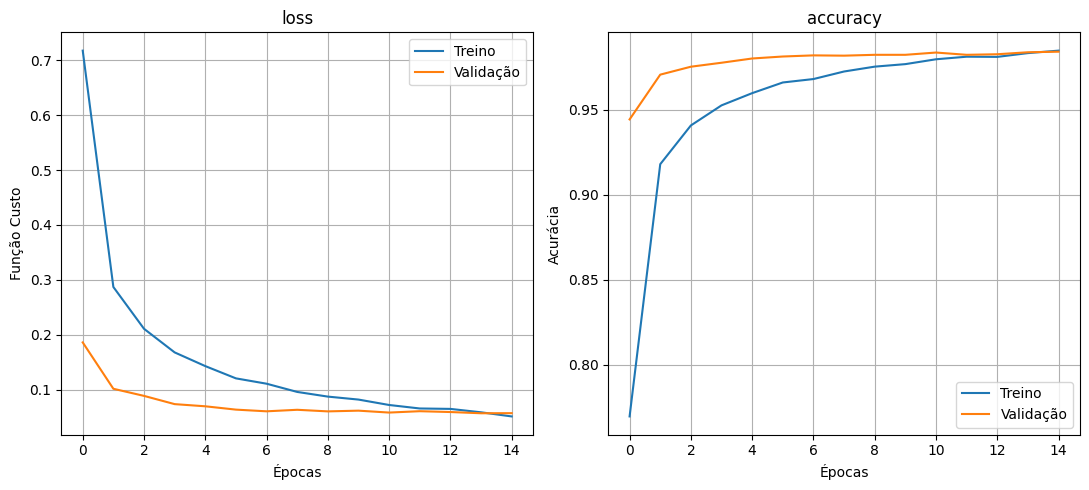

In [ ]:
plot_acc_loss(h)

Nice! Adding Dropout to our model pushed our test score above the base model for the first time (although not by much)! This is great because we didn't have to add more data. Also, notice how the training score is lower than the test score, which indicates the model is not overfitting and also there seem to be even more room for improvement if we run the training for more epochs!

In [ ]:
# salvando o Modelo para predições futuras sem ter que treiná-lo novamente
from keras.models import model_from_json
model_json = Dropout_model.to_json()
with open("Colab Notebooks/models/model_3_deeplearning.json","w") as json_file: #/content/drive/MyDrive/
    json_file.write(model_json)
Dropout_model.save_weights("Colab Notebooks/models/weights_3.weights.h5") #/content/drive/MyDrive/
print('Saved model to disk')

Saved model to disk


### Regularização

Uma  forma  de  evitar  o  *overfitting*  é  a  aplicação  de  regularização.  Um  tipo  de regularização comum às redes neurais é o *dropout*, que anula de forma aleatória, e a cada iteração, uma porcentagem dos neurônios, reduzindo, assim, a complexidade do modelo
e favorecendo a robustez do  mesmo, uma  vez que o treinamento se dá por morfologias distintas a cada iteração, evitando que certos neurônios se coadaptem ao aprendizado de neurônios anteriores.

Ao acrescentar camadas *dropout* após cada *hidden layer* com 10% a 50% dos neurônios ativos, obtém-se uma acurácia de  ~98%  e  ~98%  para os dados de treino  e  validação,  respectivamente.  A  ausência  de  *overfitting*  pode  ser  verificada, também, pelos gráficos da função custo e acurácia.

### Max Norm

O artigo sobre Dropout também menciona o uso de uma **restrição global** para melhorar ainda mais o comportamento de uma rede com Dropout. No Keras, restrições podem ser adicionadas através do parâmetro `kernel_constraint` disponível na definição de uma camada.

Seguindo o artigo, vamos verificar o efeito de impor uma restrição `max_norm` aos pesos do modelo. De acordo com a [documentação](https://keras.io/constraints/), isso equivale a dizer que a soma dos quadrados dos pesos não pode ultrapassar uma determinada **constante**, que pode ser especificada pelo usuário através do argumento `c`.


Vamos definir uma nova função de modelo, dropout_max_norm, que incorpora tanto o Dropout quanto a restrição max_norm nos pesos:

In [ ]:
from tensorflow.keras.constraints import max_norm
def dropout_max_norm(c=2.0):
    """
    MaxNorm weight constraint. Constrains the weights incident to each hidden unit
    to have a norm less than or equal to a desired value.
    Args: max_value(c): the maximum norm value for the incoming weights (default c=2).
    Return a fully connected model with Dropout and Max Norm constraint.
    """
    backend.clear_session()
    model = Sequential(name='dropout_max_norm')
    model.add(Input(shape=(28,28), name='input'))
    model.add(Flatten())
    model.add(Dropout(0.1))
    model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(c)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', kernel_constraint=max_norm(c)))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu', kernel_constraint=max_norm(c)))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation='relu', kernel_constraint=max_norm(c)))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    initial_weights_ = model.get_weights()
    model.compile(optimizer=SGD(0.05), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model, initial_weights_

In [ ]:
max_norm_model, initial_weights_max_norm = dropout_max_norm(c=1)

Model: "dropout_max_norm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.process_time()
# carrega os pesos e bias com os valores inicias, para um novo treinamento da rede
max_norm_model.set_weights(initial_weights_max_norm)
# treinamento da rede
h = max_norm_model.fit(X_train, y_train, batch_size=64, epochs=15, verbose=1, validation_split=0.1)
# tempo total de treinamento da rede
processing_time(start_time, time.process_time())

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.5777 - loss: 1.2343 - val_accuracy: 0.9445 - val_loss: 0.1843
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9086 - loss: 0.3224 - val_accuracy: 0.9638 - val_loss: 0.1275
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9392 - loss: 0.2193 - val_accuracy: 0.9740 - val_loss: 0.0898
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9518 - loss: 0.1728 - val_accuracy: 0.9778 - val_loss: 0.0794
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9580 - loss: 0.1456 - val_accuracy: 0.9788 - val_loss: 0.0707
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9661 - loss: 0.1200 - val_accuracy: 0.9778 - val_loss: 0.0726
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9720 - loss: 0.1043 - val_accuracy: 0.9805 - val_loss: 0.0656
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9713 - loss: 0.0947 - val_acc

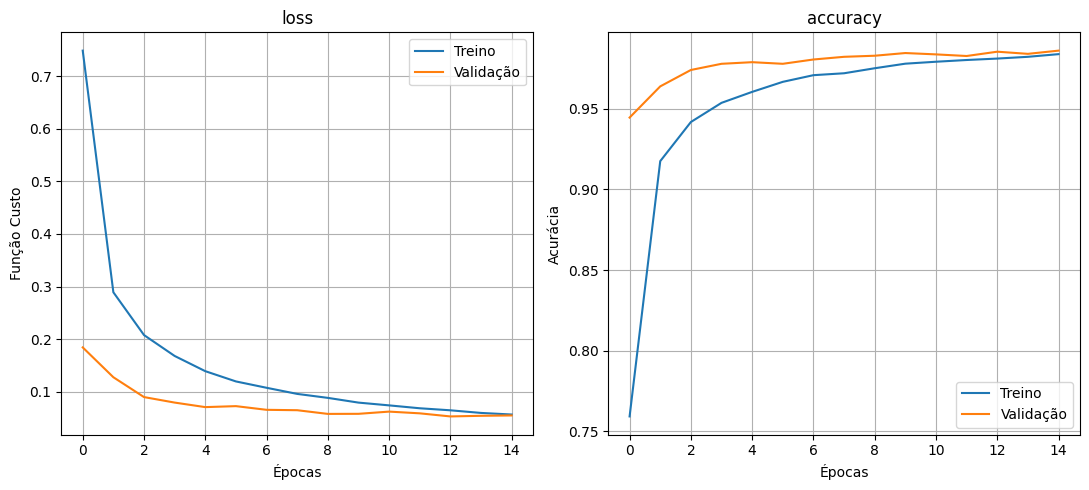

In [ ]:
plot_acc_loss(h)

Neste caso específico, a restrição **Max Norm** não parece produzir resultados qualitativamente diferentes do uso simples do **Dropout**, mas é possível que existam conjuntos de dados nos quais essa restrição ajude a rede a convergir para um resultado melhor.


In [ ]:
# salvando o Modelo para predições futuras sem ter que treiná-lo novamente
from keras.models import model_from_json
model_json = max_norm_model.to_json()
with open("Colab Notebooks/models/model_4_deeplearning.json","w") as json_file: #/content/drive/MyDrive/
    json_file.write(model_json)
max_norm_model.save_weights("Colab Notebooks/models/weights_4.weights.h5") #/content/drive/MyDrive/
print('Saved model to disk')

Saved model to disk


### Batch Normalization

**Batch Normalization** foi introduzida em 2015 como uma técnica de regularização ainda mais eficaz, conforme descrito neste [artigo](https://arxiv.org/pdf/1502.03167.pdf). Os autores observaram que o treinamento de redes neurais profundas é lento porque a distribuição das entradas de uma camada muda durante o treinamento, à medida que os parâmetros das camadas anteriores se ajustam. Como as entradas de uma camada são as saídas da camada anterior, essas mudanças fazem com que a distribuição das saídas se desloque, dificultando a adaptação da camada seguinte.

A solução proposta é introduzir uma etapa de normalização entre as camadas, que pega os valores de saída do lote atual e os normaliza, subtraindo a média e dividindo pelo desvio padrão. Os autores observaram que essa técnica permite usar **taxas de aprendizado maiores** e ser menos cuidadoso com a inicialização. Além disso, age como regularizador, eliminando em alguns casos a necessidade de Dropout.

O algoritmo da normalização por lote pode ser ilustrado com um pequeno exemplo em código. Primeiro, calculamos a média e o desvio padrão do lote:

```python
mu_B = X_batch.mean()
std_B = X_batch.std()
```

Em seguida, subtraímos a média e dividimos pelo desvio padrão:

```python
X_batch_scaled = (X_batch - mu_B) / np.sqrt(std_B**2 + 0.0001)
```

Finalmente, reescalamos o lote com dois parâmetros $\gamma$ e $\beta$, aprendidos durante o treinamento:

```python
X_batch_norm = gamma * X_batch_scaled + beta
```

> **DICA:** Em notação matemática, dado um mini-lote $B = \{x_1, ..., x_m\}$:

$$
\begin{align}
\mu_B &= \frac{1}{m} \sum_{i=1}^{m} x_i \\
\sigma_B^2 &= \frac{1}{m} \sum_{i=1}^{m} (x_i - \mu_B)^2 \\
\hat{x_i} &= \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}} \\
y_i &= \gamma \hat{x_i} + \beta
\end{align}
$$

O **Batch Normalization** é muito poderoso e também está disponível no Keras como uma camada, conforme descrito na [documentação](https://keras.io/layers/normalization/). Um ponto importante é que a normalização deve ser aplicada **antes da função de ativação não linear**. Vamos ver como isso é feito, primeiro carregando as camadas `BatchNormalization` e `Activation`.


Em seguida, definimos uma nova função de modelo, batch_norm_model, que adiciona Batch Normalization à nossa rede totalmente conectada definida no base_model:

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Activation
def batch_norm_model(momentum_=0.99):
    """
    Batch normalization applies a transformation that maintains the mean output
    close to 0 and the output standard deviation close to 1.
    momentum_: Momentum for the moving average. Default: momentum_=0.99.
    Return a fully connected model with Batch Normalization.
    """
    backend.clear_session()
    model = Sequential(name='batch_norm_model')
    model.add(Input(shape=(28,28), name='input'))
    model.add(Flatten())
    model.add(Dense(1024))
    # batch normalization must come before activation function
    model.add(BatchNormalization(momentum=momentum_))
    model.add(Activation('relu'))
    model.add(Dense(512))
    model.add(BatchNormalization(momentum=momentum_))
    model.add(Activation('relu'))
    model.add(Dense(256))
    model.add(BatchNormalization(momentum=momentum_))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(BatchNormalization(momentum=momentum_))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(BatchNormalization(momentum=momentum_))
    model.add(Activation('softmax'))
    initial_weights_ = model.get_weights()
    model.compile(optimizer=SGD(0.05), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model, initial_weights_

O **Batch Normalization** tende a funcionar melhor com **lotes menores**, portanto vamos executar a função `repeat_train` utilizando um `batch_size` menor.

Como lotes menores implicam **mais atualizações de pesos a cada época**, também reduziremos o número de épocas de treinamento para equilibrar o processo e evitar sobrecarga computacional.


In [ ]:
Batch_norm_model, initial_weights_batch_norm = batch_norm_model(0.8)

Model: "batch_norm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,874 (5.73 MB)

 Trainable params: 1,498,014 (5.71 MB)

 Non-trainable params: 3,860 (15.08 KB)

In [ ]:
start_time = time.process_time()
# carrega os pesos e bias com os valores inicias, para um novo treinamento da rede
Batch_norm_model.set_weights(initial_weights_batch_norm)
# treinamento da rede
h = Batch_norm_model.fit(X_train, y_train, batch_size=64, epochs=15, verbose=1, validation_split=0.1)
# tempo total de treinamento da rede
processing_time(start_time, time.process_time())

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8916 - loss: 0.5034 - val_accuracy: 0.9768 - val_loss: 0.1011
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9745 - loss: 0.1221 - val_accuracy: 0.9775 - val_loss: 0.0839
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9873 - loss: 0.0673 - val_accuracy: 0.9833 - val_loss: 0.0718
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9923 - loss: 0.0442 - val_accuracy: 0.9810 - val_loss: 0.0609
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9941 - loss: 0.0341 - val_accuracy: 0.9848 - val_loss: 0.0590
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9952 - loss: 0.0282 - val_accuracy: 0.9845 - val_loss: 0.0605
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9961 - loss: 0.0236 - val_accuracy: 0.9828 - val_loss: 0.0599
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9976 - loss: 0.0179 - val_accuracy: 0

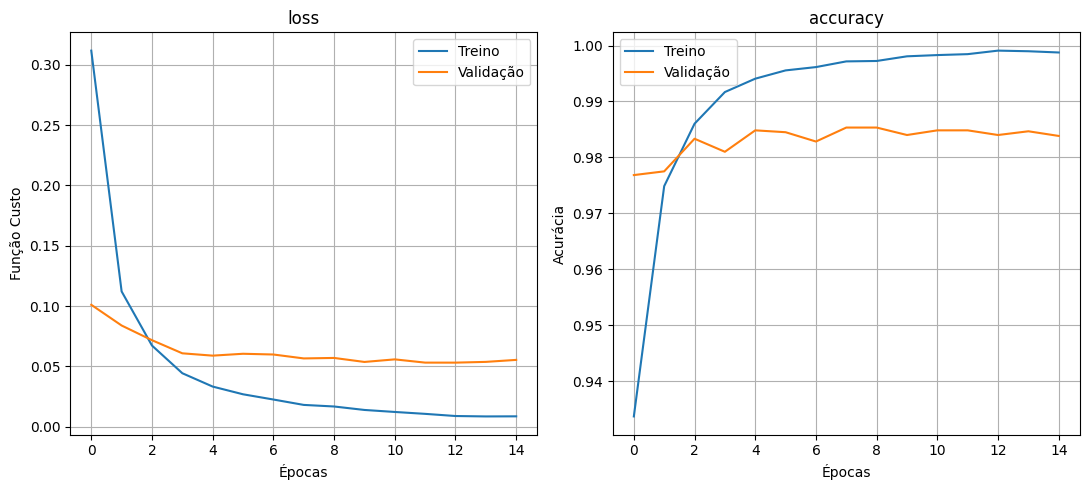

In [ ]:
plot_acc_loss(h)

In this particular case, the Batch Norm does not seem to produce results that are qualitatively different from the simple net, but there may be datasets where this normalization helps make the network converge to a better result.

If we use Batch Norm with dropout maybe we have better results. It's worth a try!

In [ ]:
# salvando o Modelo para predições futuras sem ter que treiná-lo novamente
from keras.models import model_from_json
model_json = Batch_norm_model.to_json()
with open("Colab Notebooks/models/model_5_deeplearning.json","w") as json_file: #/content/drive/MyDrive/
    json_file.write(model_json)
Batch_norm_model.save_weights("Colab Notebooks/models/weights_5.weights.h5") #/content/drive/MyDrive/
print('Saved model to disk')

Saved model to disk


#Exercícios
1. Para os exemplos de modelos vistos neste notebook, trabalhe inicialmente com o número de épocas e o batch size, de forma a tentar uma melhor performance da rede. Foque nos modelos mais promissores.
1. Utilizando os conhecimentos adquiridos nos trabalhos anteriores, faça testes com outros otimizadores com diferentes learning rates, para tentar uma melhor sintonia das redes mais promissoras.
1. Elabore gráficos e/ou tabelas com dados comparativos, mostrando o desempenho das redes selecionadas com os diferentes hiper-parâmetros escolhidos.
1. Salve os melhores modelos de rede para se fazer as predições futuras, que serão utilizadas no notebook *Deep Learning #5*.
1. Faça um teste nos modelos projetados acima com o banco de dados de dígitos que você criou. Quais modelos obtiveram melhores performance?

# Referências

[1] http://neuralnetworksanddeeplearning.com/chap1.html

[2] https://medium.com/turing-talks/turing-talks-19-modelos-de-predi%C3%A7%C3%A3o-redes-neurais-1f165583a927

[3] https://www.tutorialspoint.com/artificial_neural_network/index.htm

[4] https://matheusfacure.github.io/2017/03/05/ann-intro/

[5] https://matheusfacure.github.io/2017/05/15/deep-ff-ann/

[6] https://www.simplilearn.com/tutorials/deep-learning-tutorial

[7] https://www.datacamp.com/tutorial/tutorial-deep-learning-tutorial

[8] https://www.kaggle.com/learn/intro-to-deep-learning

# Respostas

In [ ]:
# 1) Para os exemplos de modelos vistos neste notebook, trabalhe inicialmente com o número de épocas e o batch size,
#    de forma a tentar uma melhor performance da rede. Foque nos modelos mais promissores.

models = [model, L2_model, Dropout_model, max_norm_model, Batch_norm_model]
iws    = [initial_weights, initial_weights_L2, initial_weights_dropout, initial_weights_max_norm, initial_weights_batch_norm]
h_ex1 = {}

bss = [32,64,128]
eps = [10,15,20]
for m, iw in zip(models, iws):
  for bs in bss:
    for ep in eps:
      start_time = time.process_time()
      k = m.name + '_' + str(ep) + '_' + str(bs)
      m.set_weights(iw)
      h_ex1[k] = m.fit(X_train, y_train, batch_size=bs, epochs=ep, verbose=1, validation_split=0.1)
      processing_time(start_time, time.process_time())



Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8349 - loss: 0.5537 - val_accuracy: 0.9595 - val_loss: 0.1320
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9648 - loss: 0.1164 - val_accuracy: 0.9745 - val_loss: 0.0869
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9792 - loss: 0.0673 - val_accuracy: 0.9770 - val_loss: 0.0739
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9862 - loss: 0.0432 - val_accuracy: 0.9793 - val_loss: 0.0705
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9907 - loss: 0.0283 - val_accuracy: 0.9790 - val_loss: 0.0756
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9923 - loss: 0.0249 - val_accuracy: 0.9813 - val_loss: 0.0703
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9970 - loss: 0.0117 - val_accuracy: 0.9830 - val_loss: 0.0659
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9972 - loss: 0.0091 - 

In [ ]:
import pickle

with open('ex_1.pickle', 'wb') as handle:
    pickle.dump(h_ex1, handle)

with open('ex_1.pickle', 'rb') as handle:
    b = pickle.load(handle)

print(h_ex1.values() == b.values())

False


In [ ]:
# best models

for k in h_ex1.keys():
  h_ex1[k].history['dif_acc_and_val_acc'] = (h_ex1[k].history['accuracy'][-1] / h_ex1[k].history['val_accuracy'][-1]) -1

threesold = 0.9995
h_ex1_aux = {}
#selecting the models above a threesold with the mininmu dif between train and test
for k in h_ex1.keys():
  if h_ex1[k].history['accuracy'][-1] >= threesold:
    h_ex1_aux[k] = h_ex1[k].history['dif_acc_and_val_acc']

h_ex1_sorted_by_values = dict(sorted(h_ex1_aux.items(), key=lambda item: item[1]))
print(h_ex1_sorted_by_values)
ex1_best_models = sorted(h_ex1_sorted_by_values, key=h_ex1_sorted_by_values.get, reverse=False)[:3]
ex1_best_models

{'batch_norm_model_20_64': 0.011847878968639147, 'Deep1_15_32': 0.01471336606518503, 'Deep1_20_32': 0.01522841165181843, 'batch_norm_model_10_128': 0.01538665615154744, 'batch_norm_model_15_128': 0.0156500184747157, 'Deep1_20_64': 0.016260134530829307, 'batch_norm_model_20_128': 0.016300573173947175, 'Deep1_10_32': 0.016362580961712947, 'Deep1_15_64': 0.016757965507728567, 'Deep1_20_128': 0.018276477726722806}


['batch_norm_model_20_64', 'Deep1_15_32', 'Deep1_20_32']

In [ ]:
#recreate model creating function with optimizer and learning rate parameters (only for the top 3 selected models)
def recompile_model (m, lr, opt):

    m.compile(optimizer=opt(lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    m.summary()
    return m



In [ ]:
# 2) Utilizando os conhecimentos adquiridos nos trabalhos anteriores, faça testes com outros otimizadores com diferentes learning rates,
# para tentar uma melhor sintonia das redes mais promissoras.

print(ex1_best_models)

opts = [SGD, Adam, Adagrad, RMSprop, Adadelta]
lrs = [0.01, 0.05,0.1, 0.2]
ex2_models    = {'batch_norm_model_20_64': {'iw': initial_weights_batch_norm, 'ep': 20, 'bs':64}
               ,            'Deep1_15_32': {'iw':  initial_weights , 'ep': 15, 'bs':32}
               ,            'Deep1_20_32': {'iw':  initial_weights , 'ep': 20, 'bs':32}
}


h_ex2 = {}

for m in ex2_models.keys():
   for  opt in opts:
    for lr in lrs:
      k = m + '_' + str(opt.__name__) + '_' + str(lr)

      nm = recompile_model(h_ex1[m].model, lr, opt)
      nm.set_weights( ex2_models[m]['iw'])

      start_time = time.process_time()
      h_ex2[k] = nm.fit(X_train, y_train, batch_size= ex2_models[m]['bs'], epochs=ex2_models[m]['ep'], verbose=1, validation_split=0.1)
      processing_time(start_time, time.process_time())



['batch_norm_model_20_64', 'Deep1_15_32', 'Deep1_20_32']


Model: "batch_norm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,874 (5.73 MB)

 Trainable params: 1,498,014 (5.71 MB)

 Non-trainable params: 3,860 (15.08 KB)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8168 - loss: 0.8242 - val_accuracy: 0.9625 - val_loss: 0.2490
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9473 - loss: 0.3052 - val_accuracy: 0.9717 - val_loss: 0.1608
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9646 - loss: 0.2029 - val_accuracy: 0.9735 - val_loss: 0.1257
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9716 - loss: 0.1572 - val_accuracy: 0.9758 - val_loss: 0.1027
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9794 - loss: 0.1204 - val_accuracy: 0.9780 - val_loss: 0.0931
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9835 - loss: 0.0997 - val_accuracy: 0.9785 - val_loss: 0.0856
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9877 - loss: 0.0810 - val_accuracy: 0.9795 - val_loss: 0.0811
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9908 - loss: 0.0699 - val_accuracy: 0.

Model: "batch_norm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,874 (5.73 MB)

 Trainable params: 1,498,014 (5.71 MB)

 Non-trainable params: 3,860 (15.08 KB)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8920 - loss: 0.5053 - val_accuracy: 0.9765 - val_loss: 0.0989
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9752 - loss: 0.1195 - val_accuracy: 0.9815 - val_loss: 0.0753
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9853 - loss: 0.0714 - val_accuracy: 0.9832 - val_loss: 0.0618
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9910 - loss: 0.0467 - val_accuracy: 0.9843 - val_loss: 0.0588
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9934 - loss: 0.0348 - val_accuracy: 0.9833 - val_loss: 0.0606
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9959 - loss: 0.0255 - val_accuracy: 0.9835 - val_loss: 0.0590
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9971 - loss: 0.0212 - val_accuracy: 0.9842 - val_loss: 0.0559
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9977 - loss: 0.0170 - val_accuracy: 0

Model: "batch_norm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,874 (5.73 MB)

 Trainable params: 1,498,014 (5.71 MB)

 Non-trainable params: 3,860 (15.08 KB)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9091 - loss: 0.4063 - val_accuracy: 0.9788 - val_loss: 0.0872
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9767 - loss: 0.0953 - val_accuracy: 0.9842 - val_loss: 0.0667
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9872 - loss: 0.0547 - val_accuracy: 0.9835 - val_loss: 0.0655
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9907 - loss: 0.0398 - val_accuracy: 0.9850 - val_loss: 0.0540
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9942 - loss: 0.0267 - val_accuracy: 0.9865 - val_loss: 0.0568
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9947 - loss: 0.0224 - val_accuracy: 0.9850 - val_loss: 0.0540
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9966 - loss: 0.0178 - val_accuracy: 0.9853 - val_loss: 0.0531
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9975 - loss: 0.0135 - val_accuracy: 0.

Model: "batch_norm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,874 (5.73 MB)

 Trainable params: 1,498,014 (5.71 MB)

 Non-trainable params: 3,860 (15.08 KB)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9106 - loss: 0.3629 - val_accuracy: 0.9782 - val_loss: 0.0783
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9736 - loss: 0.0943 - val_accuracy: 0.9818 - val_loss: 0.0652
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9842 - loss: 0.0562 - val_accuracy: 0.9832 - val_loss: 0.0627
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9893 - loss: 0.0386 - val_accuracy: 0.9788 - val_loss: 0.0703
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9921 - loss: 0.0293 - val_accuracy: 0.9845 - val_loss: 0.0556
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9947 - loss: 0.0211 - val_accuracy: 0.9840 - val_loss: 0.0568
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9964 - loss: 0.0145 - val_accuracy: 0.9845 - val_loss: 0.0621
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9966 - loss: 0.0140 - val_accuracy: 0.

Model: "batch_norm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,874 (5.73 MB)

 Trainable params: 1,498,014 (5.71 MB)

 Non-trainable params: 3,860 (15.08 KB)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8939 - loss: 0.4081 - val_accuracy: 0.9685 - val_loss: 0.1085
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9603 - loss: 0.1329 - val_accuracy: 0.9785 - val_loss: 0.0726
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9716 - loss: 0.0955 - val_accuracy: 0.9778 - val_loss: 0.0800
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9767 - loss: 0.0789 - val_accuracy: 0.9823 - val_loss: 0.0623
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9823 - loss: 0.0591 - val_accuracy: 0.9818 - val_loss: 0.0647
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9831 - loss: 0.0549 - val_accuracy: 0.9770 - val_loss: 0.0718
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9859 - loss: 0.0443 - val_accuracy: 0.9837 - val_loss: 0.0651
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9860 - loss: 0.0442 - 

Model: "batch_norm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,874 (5.73 MB)

 Trainable params: 1,498,014 (5.71 MB)

 Non-trainable params: 3,860 (15.08 KB)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8754 - loss: 0.4172 - val_accuracy: 0.9638 - val_loss: 0.1163
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9576 - loss: 0.1443 - val_accuracy: 0.9742 - val_loss: 0.0905
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9691 - loss: 0.1043 - val_accuracy: 0.9718 - val_loss: 0.1007
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9741 - loss: 0.0873 - val_accuracy: 0.9812 - val_loss: 0.0704
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9774 - loss: 0.0737 - val_accuracy: 0.9795 - val_loss: 0.0755
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9792 - loss: 0.0646 - val_accuracy: 0.9798 - val_loss: 0.0693
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9840 - loss: 0.0540 - val_accuracy: 0.9815 - val_loss: 0.0682
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9849 - loss: 0.0472 - 

Model: "batch_norm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,874 (5.73 MB)

 Trainable params: 1,498,014 (5.71 MB)

 Non-trainable params: 3,860 (15.08 KB)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8694 - loss: 0.4246 - val_accuracy: 0.9662 - val_loss: 0.1086
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9523 - loss: 0.1571 - val_accuracy: 0.9695 - val_loss: 0.1144
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9672 - loss: 0.1088 - val_accuracy: 0.9712 - val_loss: 0.1020
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9729 - loss: 0.0872 - val_accuracy: 0.9788 - val_loss: 0.0749
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9773 - loss: 0.0726 - val_accuracy: 0.9785 - val_loss: 0.0759
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9807 - loss: 0.0645 - val_accuracy: 0.9787 - val_loss: 0.0781
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9800 - loss: 0.0631 - val_accuracy: 0.9793 - val_loss: 0.0698
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9812 - loss: 0.0626 - 

Model: "batch_norm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,874 (5.73 MB)

 Trainable params: 1,498,014 (5.71 MB)

 Non-trainable params: 3,860 (15.08 KB)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.8593 - loss: 0.4494 - val_accuracy: 0.9608 - val_loss: 0.1290
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9489 - loss: 0.1713 - val_accuracy: 0.9743 - val_loss: 0.0903
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9619 - loss: 0.1254 - val_accuracy: 0.9745 - val_loss: 0.0887
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9690 - loss: 0.1003 - val_accuracy: 0.9757 - val_loss: 0.0788
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9734 - loss: 0.0868 - val_accuracy: 0.9715 - val_loss: 0.0967
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9753 - loss: 0.0793 - val_accuracy: 0.9755 - val_loss: 0.0817
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9801 - loss: 0.0650 - val_accuracy: 0.9772 - val_loss: 0.0836
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9796 - loss: 0.0638 - 

Model: "batch_norm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,874 (5.73 MB)

 Trainable params: 1,498,014 (5.71 MB)

 Non-trainable params: 3,860 (15.08 KB)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8787 - loss: 0.6419 - val_accuracy: 0.9737 - val_loss: 0.2118
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9680 - loss: 0.2584 - val_accuracy: 0.9785 - val_loss: 0.1500
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9791 - loss: 0.1870 - val_accuracy: 0.9798 - val_loss: 0.1278
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9837 - loss: 0.1502 - val_accuracy: 0.9825 - val_loss: 0.1123
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9891 - loss: 0.1234 - val_accuracy: 0.9833 - val_loss: 0.1003
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9917 - loss: 0.1024 - val_accuracy: 0.9840 - val_loss: 0.0965
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9941 - loss: 0.0887 - val_accuracy: 0.9857 - val_loss: 0.0844
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9949 - loss: 0.0787 - va

Model: "batch_norm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,874 (5.73 MB)

 Trainable params: 1,498,014 (5.71 MB)

 Non-trainable params: 3,860 (15.08 KB)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9083 - loss: 0.4043 - val_accuracy: 0.9783 - val_loss: 0.0858
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9761 - loss: 0.1053 - val_accuracy: 0.9833 - val_loss: 0.0678
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9865 - loss: 0.0635 - val_accuracy: 0.9843 - val_loss: 0.0582
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9906 - loss: 0.0451 - val_accuracy: 0.9867 - val_loss: 0.0553
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9931 - loss: 0.0357 - val_accuracy: 0.9835 - val_loss: 0.0619
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9954 - loss: 0.0272 - val_accuracy: 0.9862 - val_loss: 0.0531
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9963 - loss: 0.0222 - val_accuracy: 0.9867 - val_loss: 0.0506
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9978 - loss: 0.0169 - val_acc

Model: "batch_norm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,874 (5.73 MB)

 Trainable params: 1,498,014 (5.71 MB)

 Non-trainable params: 3,860 (15.08 KB)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9132 - loss: 0.3542 - val_accuracy: 0.9778 - val_loss: 0.0799
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9735 - loss: 0.0981 - val_accuracy: 0.9820 - val_loss: 0.0665
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9828 - loss: 0.0652 - val_accuracy: 0.9852 - val_loss: 0.0547
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9878 - loss: 0.0461 - val_accuracy: 0.9880 - val_loss: 0.0495
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9925 - loss: 0.0289 - val_accuracy: 0.9860 - val_loss: 0.0491
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9938 - loss: 0.0250 - val_accuracy: 0.9867 - val_loss: 0.0514
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9950 - loss: 0.0201 - val_accuracy: 0.9863 - val_loss: 0.0496
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9966 - loss: 0.0168 - val_a

Model: "batch_norm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,874 (5.73 MB)

 Trainable params: 1,498,014 (5.71 MB)

 Non-trainable params: 3,860 (15.08 KB)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9088 - loss: 0.3346 - val_accuracy: 0.9672 - val_loss: 0.1190
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9703 - loss: 0.1020 - val_accuracy: 0.9803 - val_loss: 0.0657
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9811 - loss: 0.0660 - val_accuracy: 0.9787 - val_loss: 0.0723
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9867 - loss: 0.0490 - val_accuracy: 0.9822 - val_loss: 0.0587
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9901 - loss: 0.0339 - val_accuracy: 0.9838 - val_loss: 0.0608
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9914 - loss: 0.0286 - val_accuracy: 0.9850 - val_loss: 0.0533
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9937 - loss: 0.0217 - val_accuracy: 0.9853 - val_loss: 0.0500
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9946 - loss: 0.0192 - val_acc

Model: "batch_norm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,874 (5.73 MB)

 Trainable params: 1,498,014 (5.71 MB)

 Non-trainable params: 3,860 (15.08 KB)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8755 - loss: 0.4426 - val_accuracy: 0.9735 - val_loss: 0.0923
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9653 - loss: 0.1200 - val_accuracy: 0.9808 - val_loss: 0.0684
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9767 - loss: 0.0793 - val_accuracy: 0.9772 - val_loss: 0.0791
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9825 - loss: 0.0588 - val_accuracy: 0.9822 - val_loss: 0.0631
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9854 - loss: 0.0475 - val_accuracy: 0.9825 - val_loss: 0.0666
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9862 - loss: 0.0443 - val_accuracy: 0.9832 - val_loss: 0.0666
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9895 - loss: 0.0324 - val_accuracy: 0.9833 - val_loss: 0.0631
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9898 - loss: 0.0330 - val

Model: "batch_norm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,874 (5.73 MB)

 Trainable params: 1,498,014 (5.71 MB)

 Non-trainable params: 3,860 (15.08 KB)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8649 - loss: 0.4438 - val_accuracy: 0.9700 - val_loss: 0.1006
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9608 - loss: 0.1307 - val_accuracy: 0.9753 - val_loss: 0.0807
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9741 - loss: 0.0829 - val_accuracy: 0.9845 - val_loss: 0.0594
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9773 - loss: 0.0731 - val_accuracy: 0.9807 - val_loss: 0.0730
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9837 - loss: 0.0509 - val_accuracy: 0.9837 - val_loss: 0.0669
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9863 - loss: 0.0445 - val_accuracy: 0.9843 - val_loss: 0.0738
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9884 - loss: 0.0378 - val_accuracy: 0.9820 - val_loss: 0.0783
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9899 - loss: 0.0316 - val

Model: "batch_norm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,874 (5.73 MB)

 Trainable params: 1,498,014 (5.71 MB)

 Non-trainable params: 3,860 (15.08 KB)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8597 - loss: 0.4630 - val_accuracy: 0.9693 - val_loss: 0.1025
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9576 - loss: 0.1395 - val_accuracy: 0.9787 - val_loss: 0.0754
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9735 - loss: 0.0883 - val_accuracy: 0.9812 - val_loss: 0.0704
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9790 - loss: 0.0656 - val_accuracy: 0.9785 - val_loss: 0.0848
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9830 - loss: 0.0575 - val_accuracy: 0.9793 - val_loss: 0.0801
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9860 - loss: 0.0458 - val_accuracy: 0.9825 - val_loss: 0.0671
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9870 - loss: 0.0412 - val_accuracy: 0.9830 - val_loss: 0.0720
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9898 - loss: 0.0338 - val

Model: "batch_norm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,874 (5.73 MB)

 Trainable params: 1,498,014 (5.71 MB)

 Non-trainable params: 3,860 (15.08 KB)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8421 - loss: 0.5036 - val_accuracy: 0.9658 - val_loss: 0.1102
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9563 - loss: 0.1497 - val_accuracy: 0.9732 - val_loss: 0.0916
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9708 - loss: 0.0966 - val_accuracy: 0.9792 - val_loss: 0.0819
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9761 - loss: 0.0806 - val_accuracy: 0.9792 - val_loss: 0.0712
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9788 - loss: 0.0717 - val_accuracy: 0.9827 - val_loss: 0.0733
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9835 - loss: 0.0544 - val_accuracy: 0.9848 - val_loss: 0.0664
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9855 - loss: 0.0474 - val_accuracy: 0.9823 - val_loss: 0.0654
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9880 - loss: 0.0377 - 

Model: "batch_norm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,874 (5.73 MB)

 Trainable params: 1,498,014 (5.71 MB)

 Non-trainable params: 3,860 (15.08 KB)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.5751 - loss: 1.4385 - val_accuracy: 0.9147 - val_loss: 0.6507
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.8863 - loss: 0.7248 - val_accuracy: 0.9442 - val_loss: 0.5048
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9208 - loss: 0.6092 - val_accuracy: 0.9567 - val_loss: 0.4303
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9363 - loss: 0.5438 - val_accuracy: 0.9602 - val_loss: 0.4044
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9465 - loss: 0.5068 - val_accuracy: 0.9647 - val_loss: 0.3749
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9518 - loss: 0.4757 - val_accuracy: 0.9680 - val_loss: 0.3547
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9585 - loss: 0.4496 - val_accuracy: 0.9703 - val_loss: 0.3386
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9600 - loss: 0.4332 - 

Model: "batch_norm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,874 (5.73 MB)

 Trainable params: 1,498,014 (5.71 MB)

 Non-trainable params: 3,860 (15.08 KB)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.7785 - loss: 0.9750 - val_accuracy: 0.9660 - val_loss: 0.3845
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9499 - loss: 0.4746 - val_accuracy: 0.9758 - val_loss: 0.3055
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9666 - loss: 0.3849 - val_accuracy: 0.9775 - val_loss: 0.2600
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9757 - loss: 0.3248 - val_accuracy: 0.9808 - val_loss: 0.2308
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9803 - loss: 0.2873 - val_accuracy: 0.9833 - val_loss: 0.2055
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9861 - loss: 0.2488 - val_accuracy: 0.9835 - val_loss: 0.1827
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9881 - loss: 0.2207 - val_accuracy: 0.9835 - val_loss: 0.1699
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9904 - loss: 0.1953 - 

Model: "batch_norm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,874 (5.73 MB)

 Trainable params: 1,498,014 (5.71 MB)

 Non-trainable params: 3,860 (15.08 KB)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.8323 - loss: 0.8210 - val_accuracy: 0.9723 - val_loss: 0.3016
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9619 - loss: 0.3824 - val_accuracy: 0.9798 - val_loss: 0.2356
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9772 - loss: 0.2891 - val_accuracy: 0.9818 - val_loss: 0.1850
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9856 - loss: 0.2242 - val_accuracy: 0.9847 - val_loss: 0.1557
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9887 - loss: 0.1818 - val_accuracy: 0.9845 - val_loss: 0.1342
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9918 - loss: 0.1497 - val_accuracy: 0.9863 - val_loss: 0.1207
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9947 - loss: 0.1213 - val_accuracy: 0.9857 - val_loss: 0.1082
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9957 - loss: 0.1038 - 

Model: "batch_norm_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,874 (5.73 MB)

 Trainable params: 1,498,014 (5.71 MB)

 Non-trainable params: 3,860 (15.08 KB)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8738 - loss: 0.6918 - val_accuracy: 0.9785 - val_loss: 0.2407
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9721 - loss: 0.2941 - val_accuracy: 0.9818 - val_loss: 0.1660
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9851 - loss: 0.1897 - val_accuracy: 0.9830 - val_loss: 0.1234
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9895 - loss: 0.1356 - val_accuracy: 0.9855 - val_loss: 0.0974
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9936 - loss: 0.0970 - val_accuracy: 0.9845 - val_loss: 0.0795
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9952 - loss: 0.0714 - val_accuracy: 0.9828 - val_loss: 0.0767
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9967 - loss: 0.0533 - val_accuracy: 0.9855 - val_loss: 0.0652
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9975 - loss: 0.0418 - 

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7295 - loss: 1.0023 - val_accuracy: 0.9430 - val_loss: 0.2066
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9312 - loss: 0.2372 - val_accuracy: 0.9568 - val_loss: 0.1695
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9513 - loss: 0.1697 - val_accuracy: 0.9625 - val_loss: 0.1244
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9626 - loss: 0.1295 - val_accuracy: 0.9522 - val_loss: 0.1561
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9687 - loss: 0.1086 - val_accuracy: 0.9710 - val_loss: 0.1003
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9749 - loss: 0.0853 - val_accuracy: 0.9692 - val_loss: 0.1033
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9795 - loss: 0.0709 - val_accuracy: 0.9775 - val_loss: 0.0812
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9834 - loss: 0.0575 -

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8381 - loss: 0.5453 - val_accuracy: 0.9530 - val_loss: 0.1429
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9651 - loss: 0.1141 - val_accuracy: 0.9765 - val_loss: 0.0783
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9803 - loss: 0.0647 - val_accuracy: 0.9717 - val_loss: 0.0901
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9865 - loss: 0.0448 - val_accuracy: 0.9792 - val_loss: 0.0749
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9907 - loss: 0.0288 - val_accuracy: 0.9810 - val_loss: 0.0716
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9939 - loss: 0.0204 - val_accuracy: 0.9800 - val_loss: 0.0733
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9960 - loss: 0.0151 - val_accuracy: 0.9822 - val_loss: 0.0643
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9988 - loss: 0.0068

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8514 - loss: 0.4761 - val_accuracy: 0.9102 - val_loss: 0.3075
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9687 - loss: 0.1003 - val_accuracy: 0.9757 - val_loss: 0.0740
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9806 - loss: 0.0580 - val_accuracy: 0.9807 - val_loss: 0.0672
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9879 - loss: 0.0373 - val_accuracy: 0.9748 - val_loss: 0.0839
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9909 - loss: 0.0283 - val_accuracy: 0.9408 - val_loss: 0.2260
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9933 - loss: 0.0213 - val_accuracy: 0.9830 - val_loss: 0.0712
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9957 - loss: 0.0133 - val_accuracy: 0.9797 - val_loss: 0.0749
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9963 - loss: 0.0123 

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8460 - loss: 0.4840 - val_accuracy: 0.9715 - val_loss: 0.0973
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9701 - loss: 0.0962 - val_accuracy: 0.9735 - val_loss: 0.0871
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9796 - loss: 0.0640 - val_accuracy: 0.9800 - val_loss: 0.0746
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9859 - loss: 0.0445 - val_accuracy: 0.9823 - val_loss: 0.0678
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9900 - loss: 0.0326 - val_accuracy: 0.9803 - val_loss: 0.0742
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9922 - loss: 0.0246 - val_accuracy: 0.9800 - val_loss: 0.0792
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9942 - loss: 0.0195 - val_accuracy: 0.9683 - val_loss: 0.1471
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9944 - loss: 0.0181 

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8313 - loss: 0.6324 - val_accuracy: 0.9493 - val_loss: 0.2161
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9395 - loss: 0.2568 - val_accuracy: 0.9573 - val_loss: 0.1788
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9502 - loss: 0.2087 - val_accuracy: 0.9563 - val_loss: 0.1727
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9554 - loss: 0.1848 - val_accuracy: 0.9525 - val_loss: 0.1857
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9560 - loss: 0.1853 - val_accuracy: 0.9597 - val_loss: 0.1717
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9562 - loss: 0.1968 - val_accuracy: 0.9648 - val_loss: 0.1416
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9513 - loss: 0.2119 - val_accuracy: 0.9633 - val_loss: 0.1565
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9629 - l

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.1084 - loss: 15.5046 - val_accuracy: 0.1050 - val_loss: 2.3038
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1018 - loss: 2.3083 - val_accuracy: 0.1045 - val_loss: 2.3059
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1062 - loss: 2.3062 - val_accuracy: 0.0960 - val_loss: 2.3063
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.1044 - loss: 2.3076 - val_accuracy: 0.1050 - val_loss: 2.3046
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1037 - loss: 2.3079 - val_accuracy: 0.0995 - val_loss: 2.3077
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1043 - loss: 2.3076 - val_accuracy: 0.1113 - val_loss: 2.3077
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1023 - loss: 2.3080 - val_accuracy: 0.1050 - val_loss: 2.3095
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1073 

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.1060 - loss: 106.4299 - val_accuracy: 0.1113 - val_loss: 2.3131
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1003 - loss: 2.3128 - val_accuracy: 0.0995 - val_loss: 2.3076
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1006 - loss: 2.3139 - val_accuracy: 0.1050 - val_loss: 2.3136
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1031 - loss: 2.3143 - val_accuracy: 0.1113 - val_loss: 2.3086
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.1004 - loss: 2.3135 - val_accuracy: 0.1045 - val_loss: 2.3251
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1042 - loss: 2.3138 - val_accuracy: 0.0952 - val_loss: 2.3281
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1015 - loss: 2.3143 - val_accuracy: 0.0978 - val_loss: 2.3157
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1051

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.1000 - loss: 7131.3101 - val_accuracy: 0.0992 - val_loss: 2.3239
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1016 - loss: 2.3265 - val_accuracy: 0.0915 - val_loss: 2.3166
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1017 - loss: 2.3256 - val_accuracy: 0.0952 - val_loss: 2.3256
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.0998 - loss: 2.3267 - val_accuracy: 0.1000 - val_loss: 2.3166
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.1047 - loss: 2.3244 - val_accuracy: 0.1050 - val_loss: 2.3434
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.1040 - loss: 2.3268 - val_accuracy: 0.1045 - val_loss: 2.3334
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1037 - loss: 2.3256 - val_accuracy: 0.0978 - val_loss: 2.3259
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.104

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8227 - loss: 0.6277 - val_accuracy: 0.9320 - val_loss: 0.2335
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9565 - loss: 0.1443 - val_accuracy: 0.9525 - val_loss: 0.1508
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9721 - loss: 0.0923 - val_accuracy: 0.9773 - val_loss: 0.0798
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9810 - loss: 0.0644 - val_accuracy: 0.9792 - val_loss: 0.0722
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9861 - loss: 0.0475 - val_accuracy: 0.9802 - val_loss: 0.0674
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9898 - loss: 0.0337 - val_accuracy: 0.9788 - val_loss: 0.0702
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9936 - loss: 0.0236 - val_accuracy: 0.9785 - val_loss: 0.0702
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9961 - loss: 0

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8534 - loss: 0.4520 - val_accuracy: 0.9645 - val_loss: 0.1107
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9725 - loss: 0.0893 - val_accuracy: 0.9735 - val_loss: 0.0936
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9839 - loss: 0.0519 - val_accuracy: 0.9200 - val_loss: 0.3960
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9890 - loss: 0.0340 - val_accuracy: 0.9820 - val_loss: 0.0660
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9928 - loss: 0.0225 - val_accuracy: 0.9800 - val_loss: 0.0685
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9948 - loss: 0.0163 - val_accuracy: 0.9820 - val_loss: 0.0601
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9966 - loss: 0.0114 - val_accuracy: 0.9848 - val_loss: 0.0598
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9975 - loss: 0

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8295 - loss: 0.5325 - val_accuracy: 0.9580 - val_loss: 0.1340
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9686 - loss: 0.0996 - val_accuracy: 0.9767 - val_loss: 0.0807
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9811 - loss: 0.0600 - val_accuracy: 0.9270 - val_loss: 0.2783
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9860 - loss: 0.0475 - val_accuracy: 0.9812 - val_loss: 0.0744
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9905 - loss: 0.0300 - val_accuracy: 0.9817 - val_loss: 0.0603
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9921 - loss: 0.0227 - val_accuracy: 0.9780 - val_loss: 0.0780
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9953 - loss: 0.0169 - val_accuracy: 0.9820 - val_loss: 0.0775
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9964 - loss: 0

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7667 - loss: 0.7275 - val_accuracy: 0.8252 - val_loss: 0.7140
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9645 - loss: 0.1257 - val_accuracy: 0.9737 - val_loss: 0.0852
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9778 - loss: 0.0760 - val_accuracy: 0.9732 - val_loss: 0.1080
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9832 - loss: 0.0579 - val_accuracy: 0.9810 - val_loss: 0.0692
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9888 - loss: 0.0356 - val_accuracy: 0.9798 - val_loss: 0.0732
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9901 - loss: 0.0331 - val_accuracy: 0.9817 - val_loss: 0.0719
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9926 - loss: 0.0253 - val_accuracy: 0.9792 - val_loss: 0.0799
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9934 - loss: 0

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7766 - loss: 1.1972 - val_accuracy: 0.9408 - val_loss: 0.2764
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9190 - loss: 0.4111 - val_accuracy: 0.9362 - val_loss: 0.4963
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9177 - loss: 0.4672 - val_accuracy: 0.8630 - val_loss: 0.5311
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8632 - loss: 0.7780 - val_accuracy: 0.6423 - val_loss: 1.7895
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7043 - loss: 1.5263 - val_accuracy: 0.4383 - val_loss: 1.6173
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5601 - loss: 1.8246 - val_accuracy: 0.4548 - val_loss: 1.8486
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4842 - loss: 2.3311 - val_accuracy: 0.3835 - val_loss: 1.6800
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3463 - loss: 6

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3791 - loss: 227.5513 - val_accuracy: 0.5295 - val_loss: 1.4812
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5726 - loss: 1.2901 - val_accuracy: 0.6163 - val_loss: 1.5186
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5970 - loss: 1.1819 - val_accuracy: 0.6343 - val_loss: 1.0056
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.6044 - loss: 1.2300 - val_accuracy: 0.6370 - val_loss: 1.1778
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6118 - loss: 1.1856 - val_accuracy: 0.5902 - val_loss: 1.2590
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.6178 - loss: 1.2386 - val_accuracy: 0.6960 - val_loss: 1.4546
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6797 - loss: 0.9888 - val_accuracy: 0.6620 - val_loss: 0.9211
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.6400 - loss:

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.1153 - loss: 4926.8955 - val_accuracy: 0.0992 - val_loss: 2.3168
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.1016 - loss: 2.3150 - val_accuracy: 0.1045 - val_loss: 2.3118
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.1036 - loss: 2.3144 - val_accuracy: 0.1045 - val_loss: 2.3134
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.1022 - loss: 2.3147 - val_accuracy: 0.1113 - val_loss: 2.3245
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.0980 - loss: 2.3159 - val_accuracy: 0.0952 - val_loss: 2.3198
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.1030 - loss: 2.3151 - val_accuracy: 0.0992 - val_loss: 2.3174
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.1021 - loss: 2.3151 - val_accuracy: 0.1113 - val_loss: 2.3067
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.1036 - loss

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.1128 - loss: 329758.1250 - val_accuracy: 0.0915 - val_loss: 2.3740
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.1030 - loss: 2.3296 - val_accuracy: 0.0915 - val_loss: 2.3451
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.1022 - loss: 2.3294 - val_accuracy: 0.1045 - val_loss: 2.3799
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.1043 - loss: 2.3268 - val_accuracy: 0.1050 - val_loss: 2.3249
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.1025 - loss: 2.3290 - val_accuracy: 0.1000 - val_loss: 2.3396
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.1012 - loss: 2.3298 - val_accuracy: 0.0978 - val_loss: 2.3240
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.1048 - loss: 2.3291 - val_accuracy: 0.0915 - val_loss: 2.3342
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.1055 - lo

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.5922 - loss: 1.4944 - val_accuracy: 0.9205 - val_loss: 0.3367
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8993 - loss: 0.3744 - val_accuracy: 0.9343 - val_loss: 0.2463
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9194 - loss: 0.2883 - val_accuracy: 0.9420 - val_loss: 0.2080
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9304 - loss: 0.2469 - val_accuracy: 0.9493 - val_loss: 0.1864
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9360 - loss: 0.2240 - val_accuracy: 0.9533 - val_loss: 0.1730
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9426 - loss: 0.1979 - val_accuracy: 0.9572 - val_loss: 0.1596
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9470 - loss: 0.1851 - val_accuracy: 0.9603 - val_loss: 0.1480
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9502 -

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.7979 - loss: 0.7561 - val_accuracy: 0.9525 - val_loss: 0.1773
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9441 - loss: 0.1943 - val_accuracy: 0.9602 - val_loss: 0.1439
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9579 - loss: 0.1429 - val_accuracy: 0.9695 - val_loss: 0.1089
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9675 - loss: 0.1124 - val_accuracy: 0.9720 - val_loss: 0.0966
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9731 - loss: 0.0919 - val_accuracy: 0.9767 - val_loss: 0.0897
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9769 - loss: 0.0770 - val_accuracy: 0.9738 - val_loss: 0.0857
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9820 - loss: 0.0628 - val_accuracy: 0.9705 - val_loss: 0.0896
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9846 -

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.8369 - loss: 0.5757 - val_accuracy: 0.9622 - val_loss: 0.1349
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9564 - loss: 0.1449 - val_accuracy: 0.9693 - val_loss: 0.1029
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9720 - loss: 0.0957 - val_accuracy: 0.9728 - val_loss: 0.0967
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9789 - loss: 0.0681 - val_accuracy: 0.9785 - val_loss: 0.0761
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9845 - loss: 0.0519 - val_accuracy: 0.9790 - val_loss: 0.0743
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9882 - loss: 0.0398 - val_accuracy: 0.9805 - val_loss: 0.0667
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9911 - loss: 0.0302 - val_accuracy: 0.9807 - val_loss: 0.0661
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9933 -

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.8610 - loss: 0.4672 - val_accuracy: 0.9710 - val_loss: 0.1024
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9689 - loss: 0.1015 - val_accuracy: 0.9765 - val_loss: 0.0808
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9821 - loss: 0.0616 - val_accuracy: 0.9793 - val_loss: 0.0693
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9880 - loss: 0.0395 - val_accuracy: 0.9793 - val_loss: 0.0659
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9915 - loss: 0.0295 - val_accuracy: 0.9792 - val_loss: 0.0726
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9941 - loss: 0.0197 - val_accuracy: 0.9807 - val_loss: 0.0734
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9959 - loss: 0.0134 - val_accuracy: 0.9810 - val_loss: 0.0748
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9973 -

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7406 - loss: 0.9898 - val_accuracy: 0.9425 - val_loss: 0.2090
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9301 - loss: 0.2382 - val_accuracy: 0.9577 - val_loss: 0.1563
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9510 - loss: 0.1676 - val_accuracy: 0.9670 - val_loss: 0.1193
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9629 - loss: 0.1289 - val_accuracy: 0.9665 - val_loss: 0.1098
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9695 - loss: 0.1053 - val_accuracy: 0.9692 - val_loss: 0.1075
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9749 - loss: 0.0850 - val_accuracy: 0.9747 - val_loss: 0.0852
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9792 - loss: 0.0713 - val_accuracy: 0.9753 - val_loss: 0.0827
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9836 - loss: 0.0580 -

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8335 - loss: 0.5505 - val_accuracy: 0.9612 - val_loss: 0.1269
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9664 - loss: 0.1106 - val_accuracy: 0.9713 - val_loss: 0.0935
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9809 - loss: 0.0646 - val_accuracy: 0.9790 - val_loss: 0.0713
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9865 - loss: 0.0450 - val_accuracy: 0.9802 - val_loss: 0.0723
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9912 - loss: 0.0296 - val_accuracy: 0.9722 - val_loss: 0.0921
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9943 - loss: 0.0193 - val_accuracy: 0.9812 - val_loss: 0.0643
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9967 - loss: 0.0124 - val_accuracy: 0.9813 - val_loss: 0.0712
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9969 - loss: 0.0097 -

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8529 - loss: 0.4804 - val_accuracy: 0.9722 - val_loss: 0.0992
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9679 - loss: 0.0992 - val_accuracy: 0.9790 - val_loss: 0.0702
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9814 - loss: 0.0589 - val_accuracy: 0.9797 - val_loss: 0.0689
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9876 - loss: 0.0400 - val_accuracy: 0.9768 - val_loss: 0.0748
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9904 - loss: 0.0291 - val_accuracy: 0.9778 - val_loss: 0.0737
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9930 - loss: 0.0203 - val_accuracy: 0.9787 - val_loss: 0.0698
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9957 - loss: 0.0141 - val_accuracy: 0.9823 - val_loss: 0.0756
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9974 - loss: 0.0089 -

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8484 - loss: 0.4795 - val_accuracy: 0.9710 - val_loss: 0.0862
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9694 - loss: 0.0997 - val_accuracy: 0.9653 - val_loss: 0.1176
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9807 - loss: 0.0614 - val_accuracy: 0.9772 - val_loss: 0.0791
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9865 - loss: 0.0423 - val_accuracy: 0.9782 - val_loss: 0.0776
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9876 - loss: 0.0367 - val_accuracy: 0.9780 - val_loss: 0.0762
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9932 - loss: 0.0200 - val_accuracy: 0.9773 - val_loss: 0.0788
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9942 - loss: 0.0207 - val_accuracy: 0.9833 - val_loss: 0.0625
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9952 - loss: 0.0150 - 

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8357 - loss: 0.5937 - val_accuracy: 0.9520 - val_loss: 0.2082
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9385 - loss: 0.2613 - val_accuracy: 0.9548 - val_loss: 0.1751
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9498 - loss: 0.2153 - val_accuracy: 0.9490 - val_loss: 0.1966
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9517 - loss: 0.2068 - val_accuracy: 0.9525 - val_loss: 0.2790
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9552 - loss: 0.1989 - val_accuracy: 0.9583 - val_loss: 0.1881
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9567 - loss: 0.1938 - val_accuracy: 0.9673 - val_loss: 0.1771
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9544 - loss: 0.1973 - val_accuracy: 0.9525 - val_loss: 0.1734
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9602 -

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3964 - loss: 9.0239 - val_accuracy: 0.1460 - val_loss: 2.4088
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1753 - loss: 2.1013 - val_accuracy: 0.1912 - val_loss: 1.9609
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1898 - loss: 2.0038 - val_accuracy: 0.1960 - val_loss: 1.9567
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1351 - loss: 2.2196 - val_accuracy: 0.1768 - val_loss: 2.1334
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1176 - loss: 2.2886 - val_accuracy: 0.0960 - val_loss: 2.3072
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1043 - loss: 2.3085 - val_accuracy: 0.0952 - val_loss: 2.3058
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.1057 - loss: 2.3067 - val_accuracy: 0.0960 - val_loss: 2.3117
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1024 -

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.1025 - loss: 64.4092 - val_accuracy: 0.1045 - val_loss: 2.3146
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1037 - loss: 2.3137 - val_accuracy: 0.1050 - val_loss: 2.3103
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.0996 - loss: 2.3136 - val_accuracy: 0.1113 - val_loss: 2.3097
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.1054 - loss: 2.3127 - val_accuracy: 0.1113 - val_loss: 2.3127
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1058 - loss: 2.3137 - val_accuracy: 0.1050 - val_loss: 2.3163
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1054 - loss: 2.3134 - val_accuracy: 0.0952 - val_loss: 2.3136
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1046 - loss: 2.3136 - val_accuracy: 0.1050 - val_loss: 2.3131
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1015 

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.1005 - loss: 1727.9465 - val_accuracy: 0.1000 - val_loss: 2.3316
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.1016 - loss: 2.3245 - val_accuracy: 0.1050 - val_loss: 2.3227
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1007 - loss: 2.3269 - val_accuracy: 0.0992 - val_loss: 2.3362
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1015 - loss: 2.3258 - val_accuracy: 0.0978 - val_loss: 2.3352
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.1041 - loss: 2.3257 - val_accuracy: 0.0978 - val_loss: 2.3245
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1033 - loss: 2.3260 - val_accuracy: 0.1050 - val_loss: 2.3348
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1018 - loss: 2.3257 - val_accuracy: 0.1050 - val_loss: 2.3302
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.102

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8213 - loss: 0.6345 - val_accuracy: 0.9633 - val_loss: 0.1306
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9581 - loss: 0.1421 - val_accuracy: 0.9703 - val_loss: 0.1017
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9723 - loss: 0.0951 - val_accuracy: 0.9762 - val_loss: 0.0755
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9813 - loss: 0.0612 - val_accuracy: 0.9772 - val_loss: 0.0755
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9863 - loss: 0.0472 - val_accuracy: 0.9797 - val_loss: 0.0710
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9907 - loss: 0.0343 - val_accuracy: 0.9763 - val_loss: 0.0748
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9933 - loss: 0.0259 - val_accuracy: 0.9823 - val_loss: 0.0630
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9957 - loss: 0

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8521 - loss: 0.4621 - val_accuracy: 0.9653 - val_loss: 0.1157
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9725 - loss: 0.0881 - val_accuracy: 0.9770 - val_loss: 0.0725
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9821 - loss: 0.0557 - val_accuracy: 0.9792 - val_loss: 0.0697
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9885 - loss: 0.0366 - val_accuracy: 0.9785 - val_loss: 0.0754
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9921 - loss: 0.0241 - val_accuracy: 0.9822 - val_loss: 0.0643
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9950 - loss: 0.0171 - val_accuracy: 0.9830 - val_loss: 0.0718
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9951 - loss: 0.0139 - val_accuracy: 0.9820 - val_loss: 0.0667
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9975 - loss: 0

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8362 - loss: 0.5157 - val_accuracy: 0.9697 - val_loss: 0.1050
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9691 - loss: 0.1019 - val_accuracy: 0.9762 - val_loss: 0.0886
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9810 - loss: 0.0601 - val_accuracy: 0.9715 - val_loss: 0.1095
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9873 - loss: 0.0399 - val_accuracy: 0.9813 - val_loss: 0.0666
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9910 - loss: 0.0273 - val_accuracy: 0.9810 - val_loss: 0.0747
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9930 - loss: 0.0242 - val_accuracy: 0.9822 - val_loss: 0.0660
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9954 - loss: 0.0150 - val_accuracy: 0.9845 - val_loss: 0.0685
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9954 - loss: 0

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7442 - loss: 0.7974 - val_accuracy: 0.9548 - val_loss: 0.1604
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9629 - loss: 0.1307 - val_accuracy: 0.9738 - val_loss: 0.0956
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9763 - loss: 0.0833 - val_accuracy: 0.9790 - val_loss: 0.0735
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9824 - loss: 0.0549 - val_accuracy: 0.9728 - val_loss: 0.0929
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9887 - loss: 0.0366 - val_accuracy: 0.9800 - val_loss: 0.0802
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9905 - loss: 0.0310 - val_accuracy: 0.9792 - val_loss: 0.0778
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9920 - loss: 0.0257 - val_accuracy: 0.9795 - val_loss: 0.0830
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9945 - loss: 0

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7771 - loss: 1.2876 - val_accuracy: 0.9377 - val_loss: 0.3416
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9270 - loss: 0.3900 - val_accuracy: 0.9233 - val_loss: 0.3206
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9113 - loss: 0.4927 - val_accuracy: 0.8232 - val_loss: 0.6195
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8158 - loss: 0.9472 - val_accuracy: 0.5115 - val_loss: 1.4040
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.6222 - loss: 1.5811 - val_accuracy: 0.5743 - val_loss: 1.2551
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5836 - loss: 1.9882 - val_accuracy: 0.5815 - val_loss: 3.0537
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.4936 - loss: 2.1464 - val_accuracy: 0.5002 - val_loss: 1.5759
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3976 - loss: 

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.3374 - loss: 544.1820 - val_accuracy: 0.4832 - val_loss: 1.3540
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.5739 - loss: 1.3699 - val_accuracy: 0.5927 - val_loss: 1.0072
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6146 - loss: 1.1740 - val_accuracy: 0.6142 - val_loss: 1.2767
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.6073 - loss: 1.2234 - val_accuracy: 0.6488 - val_loss: 0.9663
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6111 - loss: 1.1696 - val_accuracy: 0.5655 - val_loss: 1.1475
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5913 - loss: 1.4049 - val_accuracy: 0.6280 - val_loss: 1.2454
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6132 - loss: 1.1948 - val_accuracy: 0.6325 - val_loss: 1.0312
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6032 - los

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.1060 - loss: 10735.5420 - val_accuracy: 0.1000 - val_loss: 2.3156
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.1002 - loss: 2.4282 - val_accuracy: 0.1045 - val_loss: 2.3161
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.1008 - loss: 2.3142 - val_accuracy: 0.0952 - val_loss: 2.3106
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.1016 - loss: 2.3149 - val_accuracy: 0.0960 - val_loss: 2.3299
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.1028 - loss: 2.3146 - val_accuracy: 0.0978 - val_loss: 2.3365
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.1013 - loss: 2.3153 - val_accuracy: 0.0960 - val_loss: 2.3254
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.1025 - loss: 2.3144 - val_accuracy: 0.0952 - val_loss: 2.3212
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.1018 - los

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.1036 - loss: 192098.7031 - val_accuracy: 0.1000 - val_loss: 2.3244
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.1023 - loss: 2.3292 - val_accuracy: 0.1045 - val_loss: 2.3309
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.1047 - loss: 2.3294 - val_accuracy: 0.1050 - val_loss: 2.3506
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.1023 - loss: 2.3294 - val_accuracy: 0.1000 - val_loss: 2.3110
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.1038 - loss: 2.3286 - val_accuracy: 0.0992 - val_loss: 2.3242
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.1039 - loss: 2.3281 - val_accuracy: 0.1050 - val_loss: 2.3430
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.1000 - loss: 2.3301 - val_accuracy: 0.0978 - val_loss: 2.3945
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.1030 - lo

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.5969 - loss: 1.4952 - val_accuracy: 0.9200 - val_loss: 0.3373
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8999 - loss: 0.3747 - val_accuracy: 0.9353 - val_loss: 0.2439
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9190 - loss: 0.2919 - val_accuracy: 0.9412 - val_loss: 0.2103
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9284 - loss: 0.2479 - val_accuracy: 0.9460 - val_loss: 0.1884
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9342 - loss: 0.2251 - val_accuracy: 0.9532 - val_loss: 0.1721
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9394 - loss: 0.2066 - val_accuracy: 0.9578 - val_loss: 0.1577
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9460 - loss: 0.1870 - val_accuracy: 0.9600 - val_loss: 0.1466
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9500 -

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.7974 - loss: 0.7472 - val_accuracy: 0.9510 - val_loss: 0.1858
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9437 - loss: 0.1939 - val_accuracy: 0.9638 - val_loss: 0.1277
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9587 - loss: 0.1407 - val_accuracy: 0.9697 - val_loss: 0.1090
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9686 - loss: 0.1126 - val_accuracy: 0.9718 - val_loss: 0.0979
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9745 - loss: 0.0920 - val_accuracy: 0.9710 - val_loss: 0.0999
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9777 - loss: 0.0757 - val_accuracy: 0.9750 - val_loss: 0.0805
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9815 - loss: 0.0647 - val_accuracy: 0.9783 - val_loss: 0.0762
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9845 -

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.8344 - loss: 0.5762 - val_accuracy: 0.9580 - val_loss: 0.1507
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9574 - loss: 0.1458 - val_accuracy: 0.9662 - val_loss: 0.1187
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9717 - loss: 0.0967 - val_accuracy: 0.9763 - val_loss: 0.0816
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9796 - loss: 0.0683 - val_accuracy: 0.9783 - val_loss: 0.0767
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9847 - loss: 0.0524 - val_accuracy: 0.9785 - val_loss: 0.0753
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9880 - loss: 0.0406 - val_accuracy: 0.9783 - val_loss: 0.0736
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9913 - loss: 0.0301 - val_accuracy: 0.9792 - val_loss: 0.0766
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9938 -

Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,154 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8620 - loss: 0.4732 - val_accuracy: 0.9588 - val_loss: 0.1309
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9688 - loss: 0.1046 - val_accuracy: 0.9752 - val_loss: 0.0899
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9806 - loss: 0.0631 - val_accuracy: 0.9765 - val_loss: 0.0792
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9875 - loss: 0.0426 - val_accuracy: 0.9790 - val_loss: 0.0720
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9911 - loss: 0.0295 - val_accuracy: 0.9790 - val_loss: 0.0721
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9944 - loss: 0.0187 - val_accuracy: 0.9815 - val_loss: 0.0692
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9965 - loss: 0.0126 - val_accuracy: 0.9828 - val_loss: 0.0682
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9971 -

In [ ]:
import pickle

with open('ex_2.pickle', 'wb') as handle:
    pickle.dump(h_ex2, handle)

with open('ex_2.pickle', 'rb') as handle:
    b = pickle.load(handle)

print(h_ex2.values() == b.values())

False


In [ ]:
for k in h_ex2.keys():
  h_ex2[k].history['dif_acc_and_val_acc'] = (h_ex2[k].history['accuracy'][-1] / h_ex2[k].history['val_accuracy'][-1]) -1

threesold = 0.9998
h_ex2_aux = {}
#selecting the models above a threesold with the mininmu dif between train and test
for k in h_ex2.keys():
  if h_ex2[k].history['accuracy'][-1] >= threesold:
    h_ex2_aux[k] = h_ex2[k].history['dif_acc_and_val_acc']

h_ex2_sorted_by_values = dict(sorted(h_ex2_aux.items(), key=lambda item: item[1]))
#print(h_ex2_sorted_by_values)
ex2_best_models = sorted(h_ex2_sorted_by_values, key=h_ex2_sorted_by_values.get, reverse=False)[:3]
ex2_best_models

['Deep1_20_32_Adagrad_0.1', 'Deep1_20_32_Adagrad_0.05', 'Deep1_20_32_SGD_0.1']

In [ ]:
import pandas as pd

def compare_models_results(models_history_dict):

    results = []

    for model_name, history in models_history_dict.items():
        metrics = {}
        for key, values in history.history.items():

            if isinstance(values, (list, tuple)):  # Check if the value is iterable
                if 'accuracy' in key:  # Use max for accuracy metrics
                    metrics[key] = max(values)
                else:  # Use min for loss or similar metrics
                    metrics[key] = min(values)
            else:
                metrics[key] = values  # Directly assign if it's a single value
        metrics['model'] = model_name  # Add the model name to the row
        results.append(metrics)
    # Convert to a pandas DataFrame
    df = pd.DataFrame(results)
    df.set_index('model', inplace=True)  # Set the model name as the index

    return df

In [ ]:
# 3) Elabore gráficos e/ou tabelas com dados comparativos, mostrando o desempenho das redes selecionadas com os diferentes hiper-parâmetros escolhidos.

comparison_df = compare_models_results(h_ex2)
comparison_df



,accuracy,loss,val_accuracy,val_loss,dif_acc_and_val_acc
model,,,,,
batch_norm_model_20_64_SGD_0.01,0.998389,0.022557,0.983833,0.060874,0.015983
batch_norm_model_20_64_SGD_0.05,0.999648,0.005176,0.987167,0.049688,0.013126
batch_norm_model_20_64_SGD_0.1,0.999519,0.003698,0.988667,0.048163,0.013368
batch_norm_model_20_64_SGD_0.2,0.999241,0.003296,0.988333,0.051054,0.012383
batch_norm_model_20_64_Adam_0.01,0.995852,0.014140,0.986333,0.059044,0.010453
batch_norm_model_20_64_Adam_0.05,0.994778,0.016063,0.986000,0.062124,0.009414
batch_norm_model_20_64_Adam_0.1,0.993444,0.020847,0.984000,0.065219,0.010310
batch_norm_model_20_64_Adam_0.2,0.992352,0.024354,0.983167,0.067646,0.009685
batch_norm_model_20_64_Adagrad_0.01,0.999018,0.031369,0.986333,0.057953,0.012861


In [ ]:
# 4) Salve os melhores modelos de rede para se fazer as predições futuras, que serão utilizadas no notebook Deep Learning #5.

models_ex4 = {}
for m in ex2_best_models:
  models_ex4[m] = h_ex2[m].model


import pickle

with open('ex_4.pickle', 'wb') as handle:
    pickle.dump(models_ex4, handle)

with open('ex_4.pickle', 'rb') as handle:
    b = pickle.load(handle)



False


In [ ]:
from PIL import Image
from numpy import asarray
import albumentations as A
import random
img = 'Colab Notebooks/images/{d}.png'
i = 0

X_test_new = np.zeros((50, 28, 28))
X_test_flat_new = X_test_new.reshape(-1, 28*28)
X_test_sc_new = X_test_flat_new / 255
y_test_new = np.zeros((50))


def data_augmentation(data):
  image = np.array(data)
  random.seed(7)
  images = [data,
            A.VerticalFlip(p=1)(image=image)['image'],
            A.Rotate(-30)(image=image)['image'],
            A.Rotate(-95)(image=image)['image'],
            A.Rotate(70)(image=image)['image']

           ]
  return images

for d in range(10):
  image_file = img.replace("{d}", str(d))

  img1=Image.open(image_file)
  img1.thumbnail((28,28))
  img2=img1.convert(mode='L')
  img3=asarray(img2)
  img3 = 255 - img3
  img_to_import = data_augmentation(img3)
  for im in img_to_import:
    X_test_new[i] = im
    X_test_flat_new[i] = X_test_new[i].reshape(-1, 28*28)
    X_test_sc_new[i] = X_test_flat_new[i] / 255
    y_test_new[i] = d
    i += 1


# função para visualização das predições (examples: 28*28 pixels)
def show_predict_ex2(examples, targets, predict_):
    init = 0
    plt.figure(figsize=(10, 10))

    for i in range(49):
        plt.subplot(8, 8, i+1)
        plt.imshow(examples[init + i], cmap='Greys')
        plt.xlabel(f'y: {targets[init + i]} - ŷ: {predict_[init + i]}', size = 9)
        plt.xticks([])
        plt.yticks([])

    plt.tight_layout()
    plt.show()


**********************************************************************************************************************
Model Name: Deep1_20_32_Adagrad_0.1
**********************************************************************************************************************
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


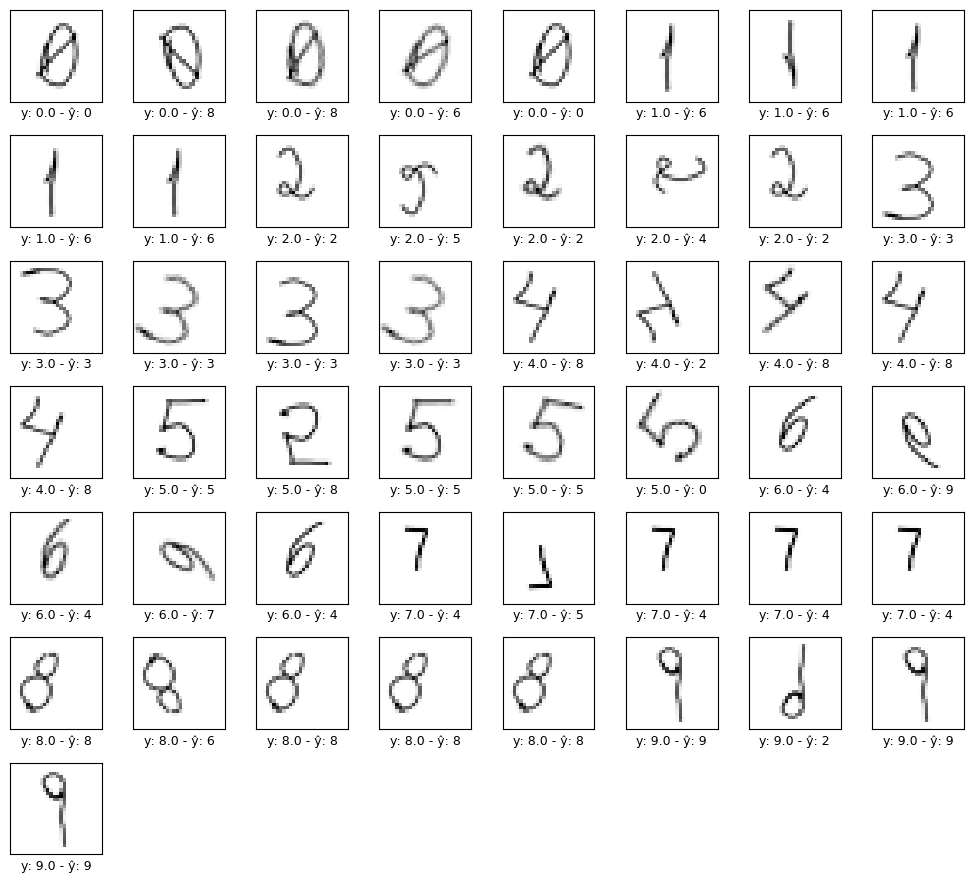

**********************************************************************************************************************
**********************************************************************************************************************
Model Name: Deep1_20_32_Adagrad_0.05
**********************************************************************************************************************
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


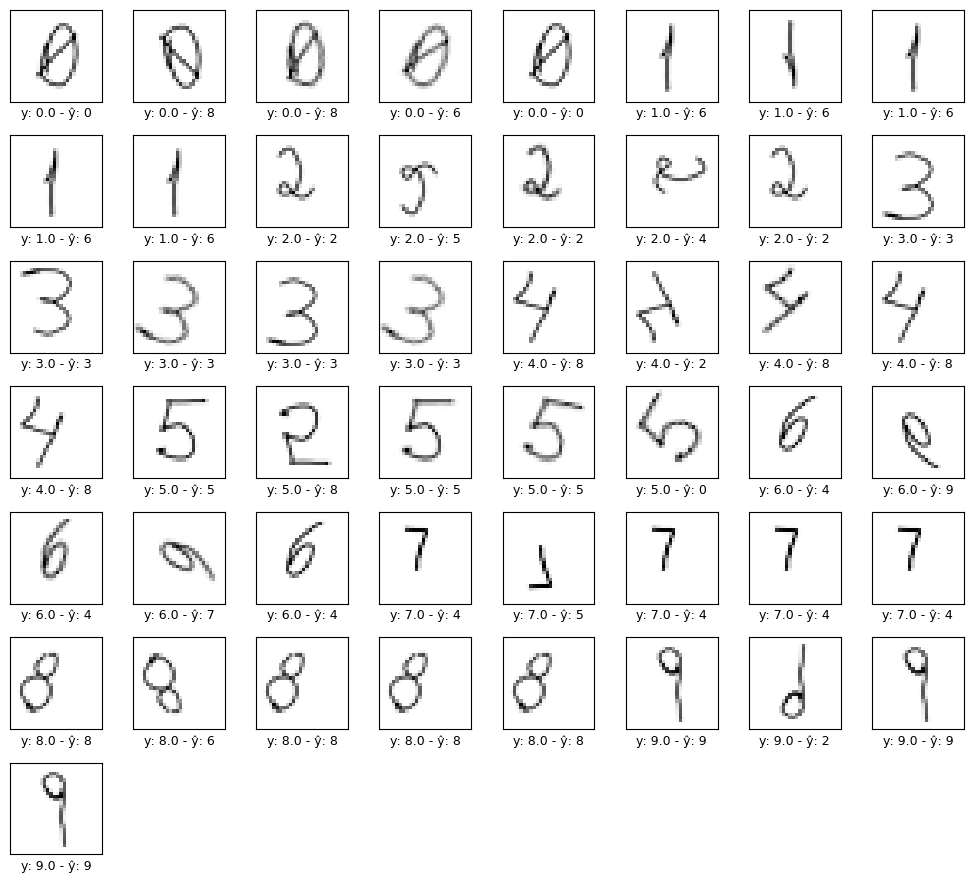

**********************************************************************************************************************
**********************************************************************************************************************
Model Name: Deep1_20_32_SGD_0.1
**********************************************************************************************************************
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


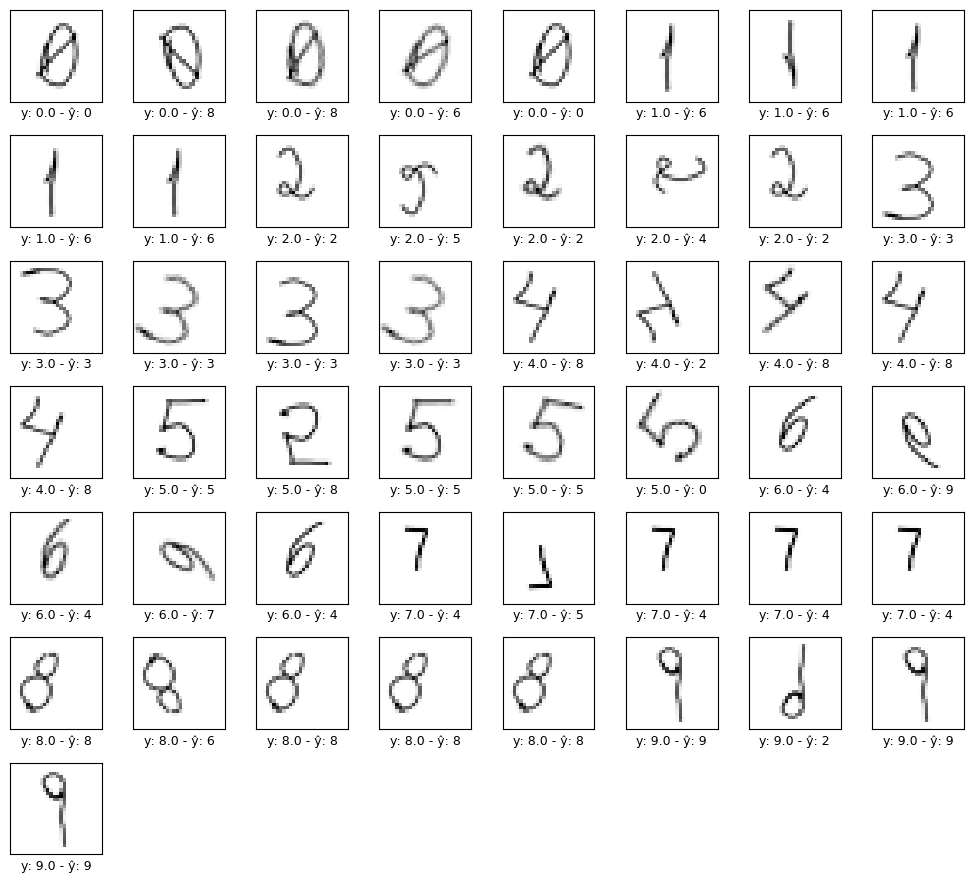

**********************************************************************************************************************


In [ ]:
# 5) Faça um teste nos modelos projetados acima com o banco de dados de dígitos que você criou. Quais modelos obtiveram melhores performance?
predictions = {}

for m in models_ex4.keys():
  print('**********************************************************************************************************************')
  print('Model Name:',m)
  print('**********************************************************************************************************************')
  predictions[m] = np.argmax(models_ex4[m].predict(X_test_new),axis=1)

  #prediction_new = my_model.predict(X_train_sc)
  #y_predict_new = np.argmax(prediction_new,axis=1)


  show_predict_ex2(X_test_new, y_test_new, predictions[m])
  print('**********************************************************************************************************************')